In [8]:
from services.load_dataset import load_data
from services.modeling import create_sequences, apply_smote, train_and_plot_results
import pickle

X_train, X_val, X_test, y_train, y_val, y_test  = load_data(data_folder='data')

X_train_seq_datasets_original = []
y_train_seq_datasets_original = []
X_train_seq_datasets = []
y_train_seq_datasets = []

best_hp = pickle.load(open('model/best_hp.pkl', 'rb'))
print('Best hyperparameters:', best_hp.values)

# Vary the X_train and y_train size to see how it affects the privacy
# Take last 90%, 80%, ... 10% of the dataset
for i in range(1, 11):
    X_train_ds = X_train[:int(len(X_train) * i / 10)]
    y_train_ds = y_train[:int(len(y_train) * i / 10)]
    X_train_seq_original, y_train_seq_original = create_sequences(X_train_ds, y_train_ds, best_hp['sequence_length'])
    X_train_seq, y_train_seq = apply_smote(X_train_seq_original, y_train_seq_original, sampling_strategy=0.25)

    X_train_seq_datasets_original.append(X_train_seq_original)
    y_train_seq_datasets_original.append(y_train_seq_original)
    X_train_seq_datasets.append(X_train_seq)
    y_train_seq_datasets.append(y_train_seq)
    

X_train_seq, y_train_seq = X_train_seq_datasets[-1], y_train_seq_datasets[-1]
X_val_seq, y_val_seq = create_sequences(X_val, y_val, best_hp['sequence_length'])
X_test_seq, y_test_seq = create_sequences(X_test, y_test, best_hp['sequence_length'])

Best hyperparameters: {'sequence_length': 5, 'units_lstm1': 128, 'dropout1': 0.4, 'units_lstm2': 32, 'dropout2': 0.1, 'learning_rate': 1.3689316316414068e-06}


c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\e

In [9]:
import pandas as pd
# count the number of classes and percentages in the training dataset
print('Number of classes in the training dataset')
print(pd.Series(y_train).value_counts())
print(f'Percentage of class 0: {pd.Series(y_train).value_counts()[0] / len(y_train) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_train).value_counts()[1] / len(y_train) * 100:.2f}%')
print('Number of classes in the validation dataset')
print(pd.Series(y_val).value_counts())
print(f'Percentage of class 0: {pd.Series(y_val).value_counts()[0] / len(y_val) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_val).value_counts()[1] / len(y_val) * 100:.2f}%')
print('Number of classes in the test dataset')
print(pd.Series(y_test).value_counts())
print(f'Percentage of class 0: {pd.Series(y_test).value_counts()[0] / len(y_test) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_test).value_counts()[1] / len(y_test) * 100:.2f}%')

print('Number of classes in the training dataset after applying SMOTE')
print(pd.Series(y_train_seq).value_counts())
print(f'Percentage of class 0: {pd.Series(y_train_seq).value_counts()[0] / len(y_train_seq) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_train_seq).value_counts()[1] / len(y_train_seq) * 100:.2f}%')

Number of classes in the training dataset
0.0    157515
1.0       353
Name: count, dtype: int64
Percentage of class 0: 99.78%
Percentage of class 1: 0.22%
Number of classes in the validation dataset
0.0    50743
1.0       40
Name: count, dtype: int64
Percentage of class 0: 99.92%
Percentage of class 1: 0.08%
Number of classes in the test dataset
0.0    76057
1.0       99
Name: count, dtype: int64
Percentage of class 0: 99.87%
Percentage of class 1: 0.13%
Number of classes in the training dataset after applying SMOTE
0    156254
1     39063
Name: count, dtype: int64
Percentage of class 0: 80.00%
Percentage of class 1: 20.00%


X_train_seq shape: (9725, 5, 29)
y_train_seq shape: (9725,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)

Epoch 1/10


304/304 [==============================] - 14s 30ms/step - loss: 0.1743 - accuracy: 0.5244 - precision: 0.2494 - recall: 0.6859 - auc: 0.6089 - val_loss: 0.1718 - val_accuracy: 0.5538 - val_precision: 0.0047 - val_recall: 0.5602 - val_auc: 0.5975
Epoch 2/10
304/304 [==============================] - 9s 29ms/step - loss: 0.1701 - accuracy: 0.5947 - precision: 0.2849 - recall: 0.6797 - auc: 0.6699 - val_loss: 0.1715 - val_accuracy: 0.5614 - val_precision: 0.0056 - val_recall: 0.6545 - val_auc: 0.6535
Epoch 3/10
304/304 [==============================] - 8s 27ms/step - loss: 0.1658 - accuracy: 0.6618 - precision: 0.3323 - recall: 0.6843 - auc: 0.7231 - val_loss: 0.1711 - val_accuracy: 0.5683 - val_precision: 0.0062 - val_recall: 0.7120 - val_auc: 0.7016
Epoch 4/10
304/304 [==============================] - 8s 27ms/step - loss: 0.1620 - accuracy: 0.7116 - prec

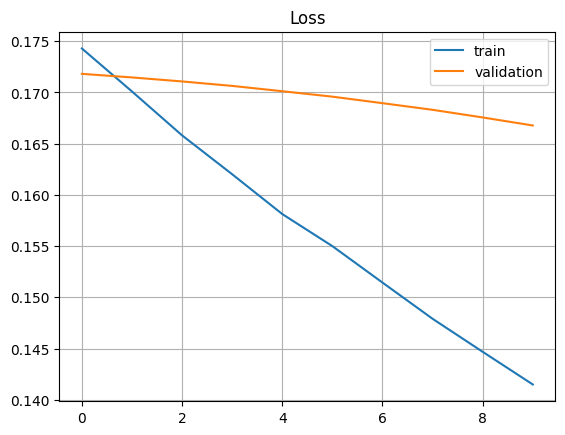

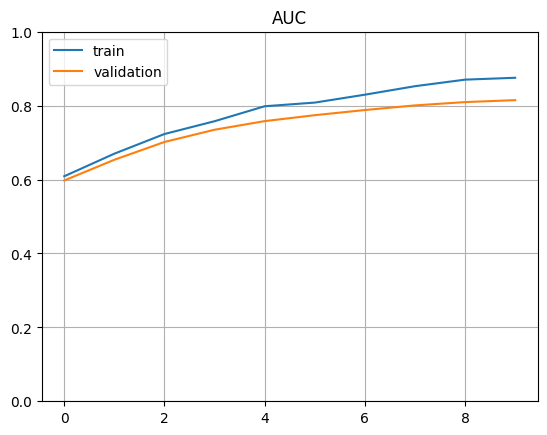

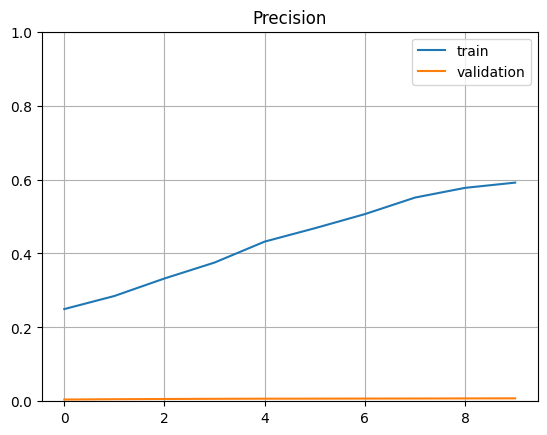

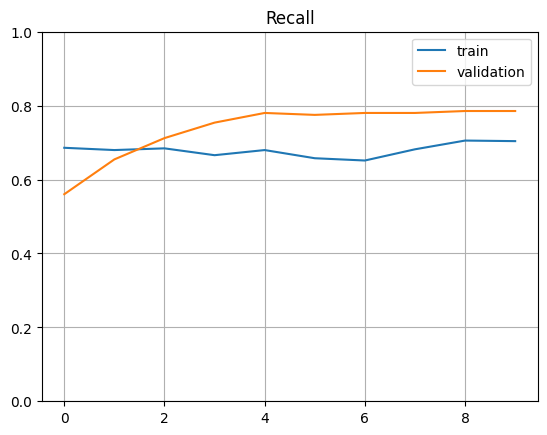

2380/2380 [==============================] - 9s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79     75668
           1       0.01      0.83      0.03       484

    accuracy                           0.65     76152
   macro avg       0.51      0.74      0.41     76152
weighted avg       0.99      0.65      0.78     76152

Confusion Matrix:


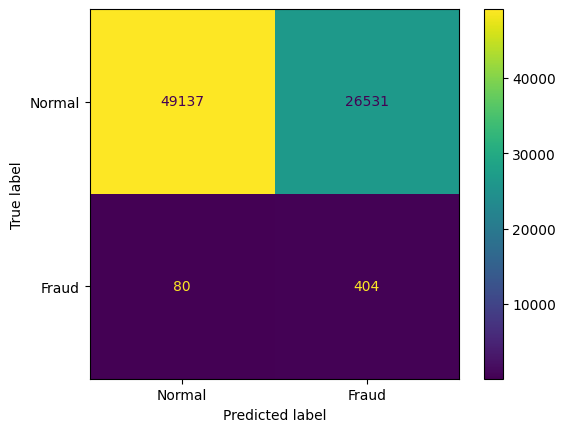

X_train_seq shape: (19308, 5, 29)
y_train_seq shape: (19308,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
604/604 [==============================] - 16s 20ms/step - loss: 0.1608 - accuracy: 0.6691 - precision: 0.2572 - recall: 0.3468 - auc: 0.5812 - val_loss: 0.1806 - val_accuracy: 0.3932 - val_precision: 0.0044 - val_recall: 0.7173 - val_auc: 0.6195
Epoch 2/10
604/604 [==============================] - 11s 18ms/step - loss: 0.1508 - accuracy: 0.7274 - precision: 0.3407 - recall: 0.3882 - auc: 0.6789 - val_loss: 0.1803 - val_accuracy: 0.4007 - val_precision: 0.0049 - val_recall: 0.7906 - val_auc: 0.6887
Epoch 3/10
604/604 [==============================] - 11s 18ms/step - loss: 0.1417 - accuracy: 0.7631 - precision: 0.4143 - recall: 0.4465 - auc: 0.7470 - val_loss: 0.1799 - val_accuracy: 0.4133 - val_precision: 0.0053 - val_recall: 0.8325 - val_auc: 0.7406
Epoch 4/10
604/604 [==============================] - 11s 19ms/step - loss: 0.1338 - accuracy: 0.7859 - pr

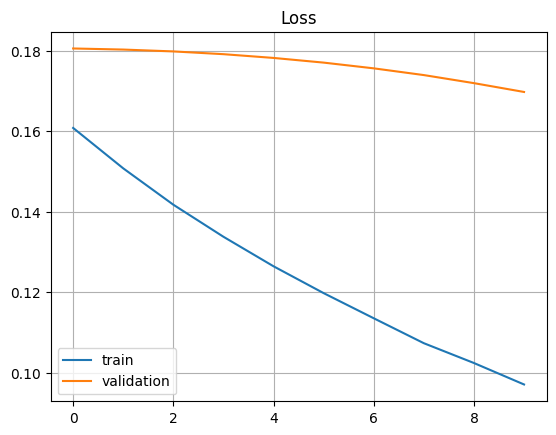

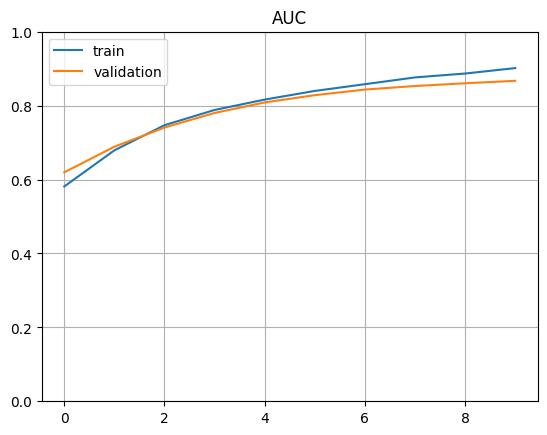

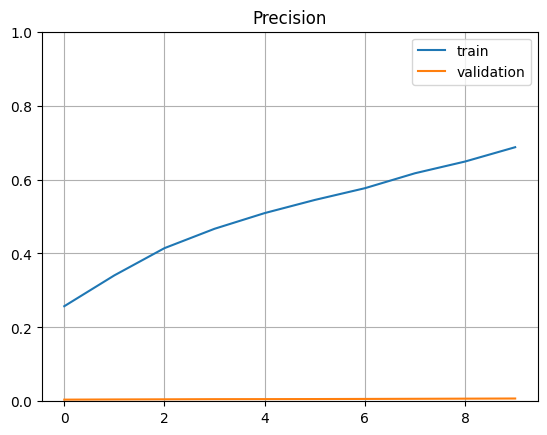

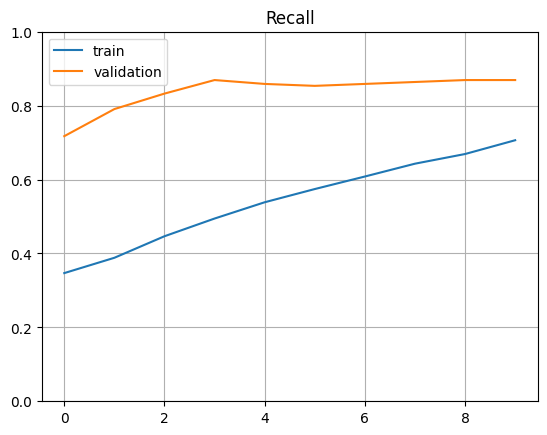

2380/2380 [==============================] - 9s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73     75668
           1       0.01      0.89      0.03       484

    accuracy                           0.57     76152
   macro avg       0.51      0.73      0.38     76152
weighted avg       0.99      0.57      0.72     76152

Confusion Matrix:


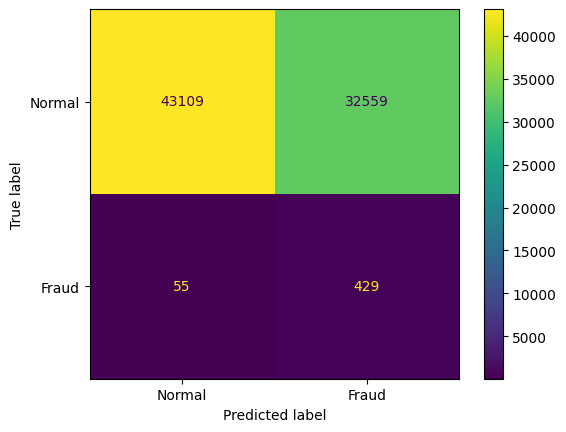

X_train_seq shape: (29076, 5, 29)
y_train_seq shape: (29076,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
909/909 [==============================] - 18s 16ms/step - loss: 0.1708 - accuracy: 0.5578 - precision: 0.3033 - recall: 0.9338 - auc: 0.8400 - val_loss: 0.1828 - val_accuracy: 0.3609 - val_precision: 0.0054 - val_recall: 0.9267 - val_auc: 0.8403
Epoch 2/10
909/909 [==============================] - 13s 14ms/step - loss: 0.1574 - accuracy: 0.7069 - precision: 0.4010 - recall: 0.9427 - auc: 0.9246 - val_loss: 0.1802 - val_accuracy: 0.4026 - val_precision: 0.0058 - val_recall: 0.9267 - val_auc: 0.8712
Epoch 3/10
909/909 [==============================] - 13s 15ms/step - loss: 0.1461 - accuracy: 0.8140 - precision: 0.5199 - recall: 0.9187 - auc: 0.9447 - val_loss: 0.1776 - val_accuracy: 0.4497 - val_precision: 0.0062 - val_recall: 0.9110 - val_auc: 0.8858
Epoch 4/10
909/909 [==============================] - 13s 15ms/step - loss: 0.1364 - accuracy: 0.8576 - pr

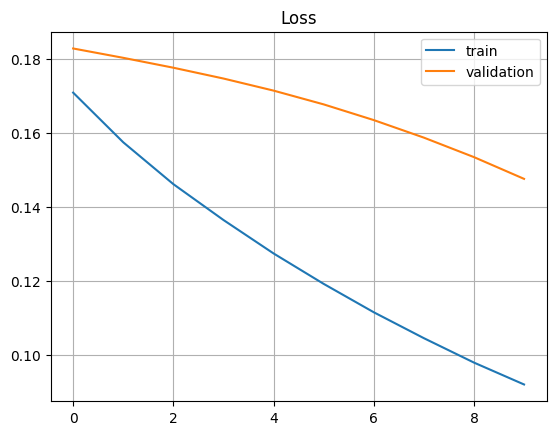

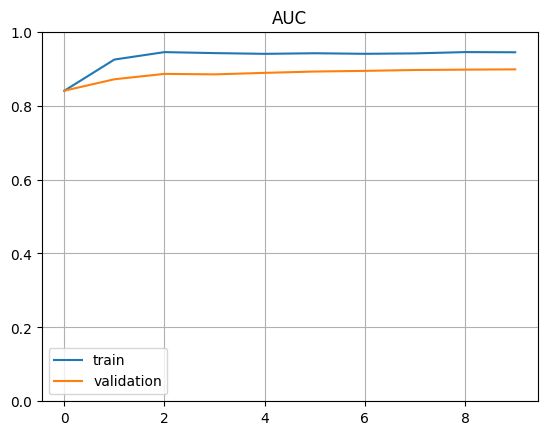

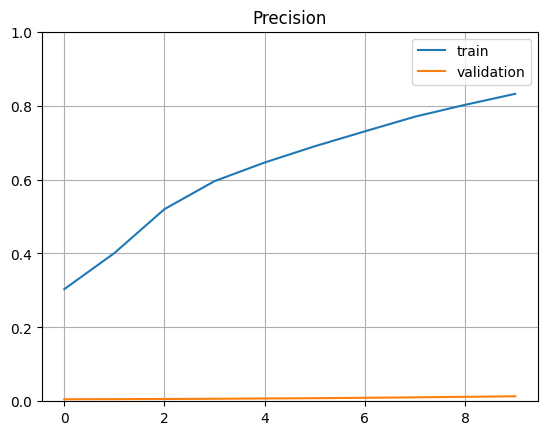

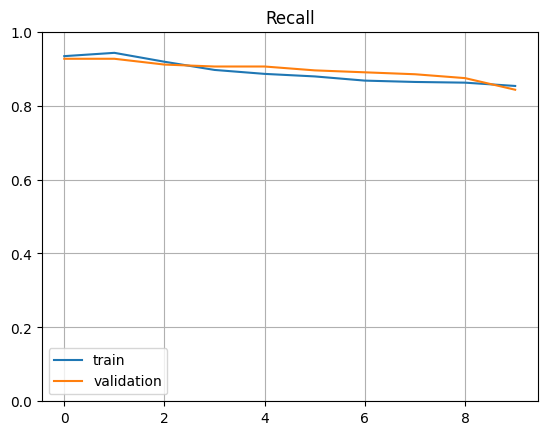

2380/2380 [==============================] - 9s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     75668
           1       0.02      0.86      0.04       484

    accuracy                           0.76     76152
   macro avg       0.51      0.81      0.45     76152
weighted avg       0.99      0.76      0.86     76152

Confusion Matrix:


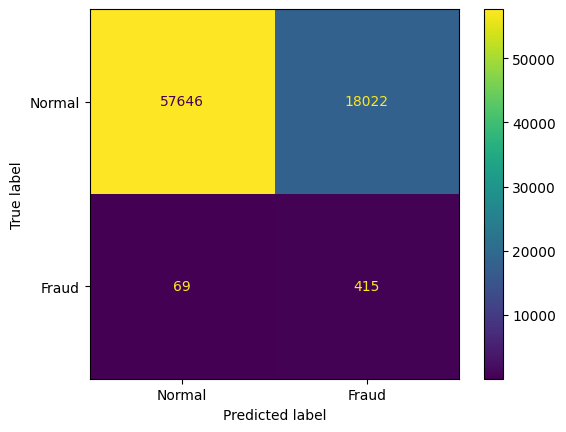

X_train_seq shape: (38855, 5, 29)
y_train_seq shape: (38855,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
1215/1215 [==============================] - 22s 14ms/step - loss: 0.1707 - accuracy: 0.5641 - precision: 0.2572 - recall: 0.6245 - auc: 0.6253 - val_loss: 0.1840 - val_accuracy: 0.3526 - val_precision: 0.0045 - val_recall: 0.7696 - val_auc: 0.6340
Epoch 2/10
1215/1215 [==============================] - 16s 13ms/step - loss: 0.1561 - accuracy: 0.7198 - precision: 0.3932 - recall: 0.7380 - auc: 0.8083 - val_loss: 0.1786 - val_accuracy: 0.4241 - val_precision: 0.0051 - val_recall: 0.7906 - val_auc: 0.7472
Epoch 3/10
1215/1215 [==============================] - 16s 13ms/step - loss: 0.1431 - accuracy: 0.8181 - precision: 0.5306 - recall: 0.7859 - auc: 0.8832 - val_loss: 0.1726 - val_accuracy: 0.5112 - val_precision: 0.0063 - val_recall: 0.8168 - val_auc: 0.7993
Epoch 4/10
1215/1215 [==============================] - 17s 14ms/step - loss: 0.1310 - accuracy: 0.8

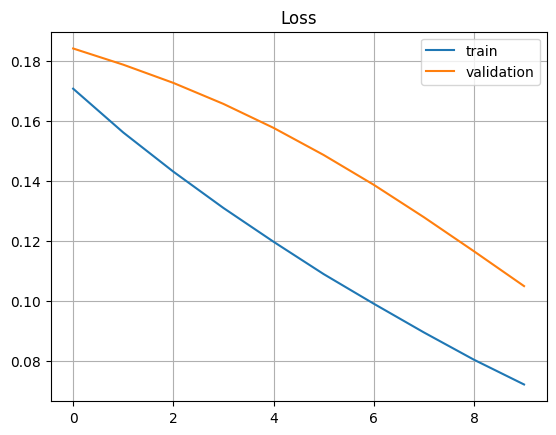

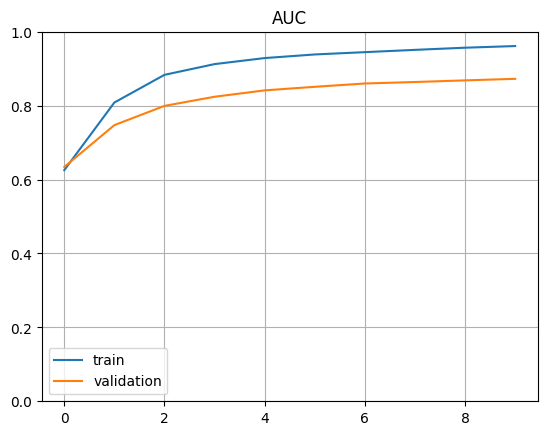

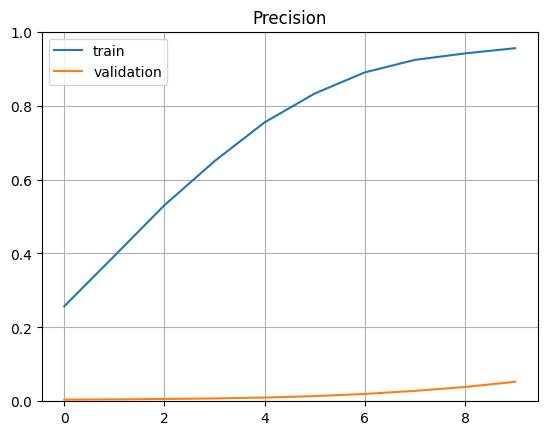

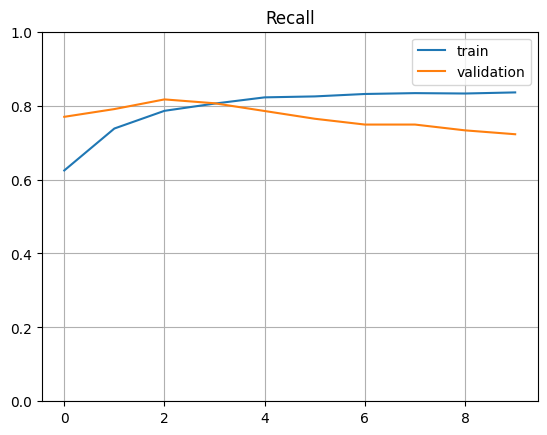

2380/2380 [==============================] - 9s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     75668
           1       0.07      0.76      0.14       484

    accuracy                           0.94     76152
   macro avg       0.54      0.85      0.55     76152
weighted avg       0.99      0.94      0.96     76152

Confusion Matrix:


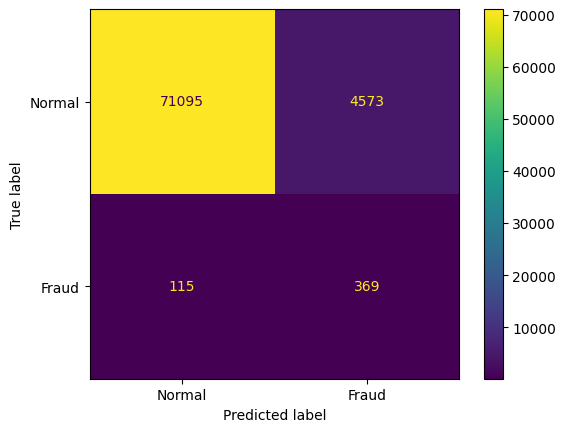

X_train_seq shape: (48710, 5, 29)
y_train_seq shape: (48710,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
1523/1523 [==============================] - 23s 12ms/step - loss: 0.1656 - accuracy: 0.6112 - precision: 0.2947 - recall: 0.6774 - auc: 0.7057 - val_loss: 0.1859 - val_accuracy: 0.2953 - val_precision: 0.0041 - val_recall: 0.7696 - val_auc: 0.6704
Epoch 2/10
1523/1523 [==============================] - 19s 13ms/step - loss: 0.1520 - accuracy: 0.7692 - precision: 0.4569 - recall: 0.8166 - auc: 0.8712 - val_loss: 0.1798 - val_accuracy: 0.3924 - val_precision: 0.0049 - val_recall: 0.7906 - val_auc: 0.7525
Epoch 3/10
1523/1523 [==============================] - 18s 12ms/step - loss: 0.1390 - accuracy: 0.8656 - precision: 0.6206 - recall: 0.8440 - auc: 0.9155 - val_loss: 0.1733 - val_accuracy: 0.5010 - val_precision: 0.0060 - val_recall: 0.7958 - val_auc: 0.7878
Epoch 4/10
1523/1523 [==============================] - 18s 12ms/step - loss: 0.1265 - accuracy: 0.9

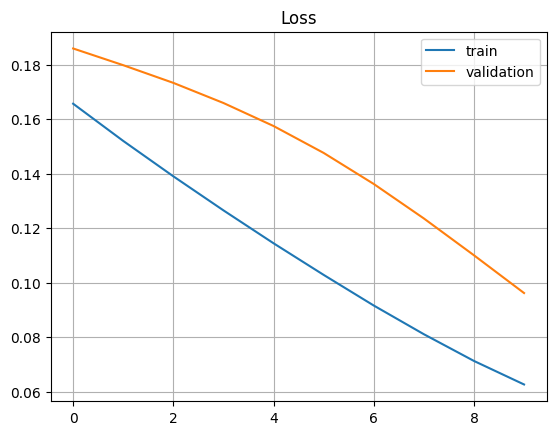

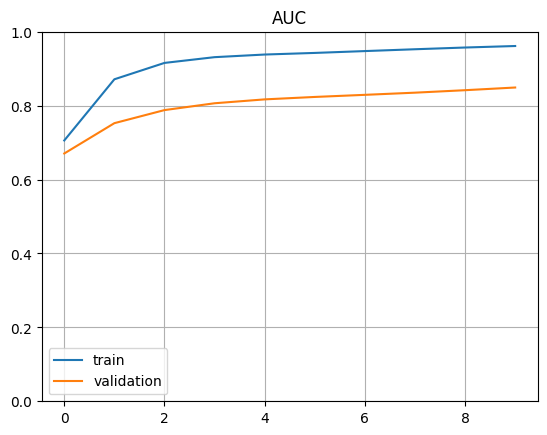

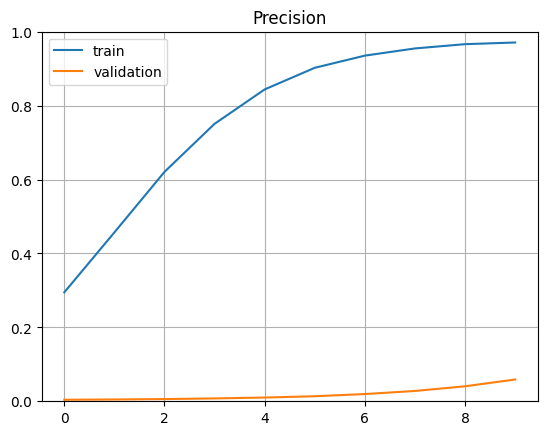

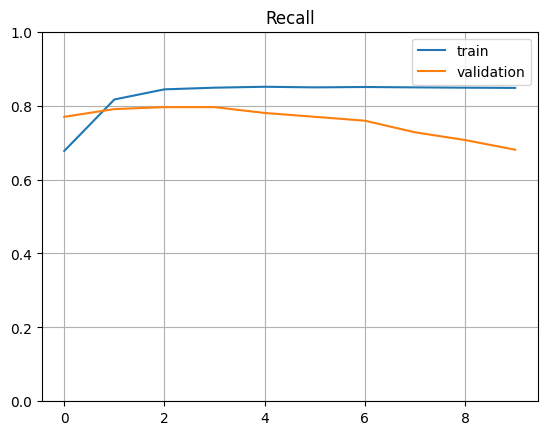

2380/2380 [==============================] - 9s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     75668
           1       0.07      0.76      0.14       484

    accuracy                           0.94     76152
   macro avg       0.54      0.85      0.55     76152
weighted avg       0.99      0.94      0.96     76152

Confusion Matrix:


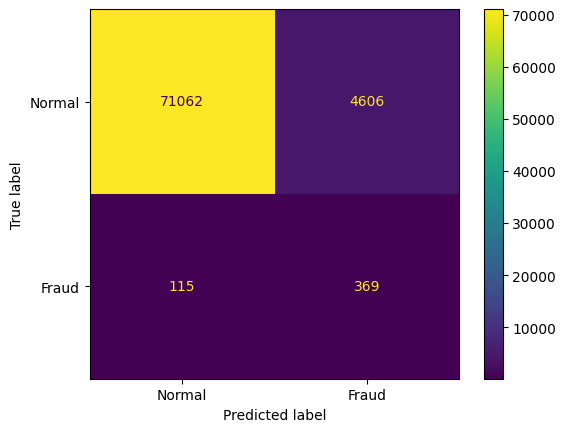

X_train_seq shape: (58316, 5, 29)
y_train_seq shape: (58316,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
1823/1823 [==============================] - 26s 13ms/step - loss: 0.1731 - accuracy: 0.4934 - precision: 0.1659 - recall: 0.3804 - auc: 0.4414 - val_loss: 0.1789 - val_accuracy: 0.3455 - val_precision: 0.0036 - val_recall: 0.6335 - val_auc: 0.5205
Epoch 2/10
1823/1823 [==============================] - 21s 11ms/step - loss: 0.1568 - accuracy: 0.7164 - precision: 0.3806 - recall: 0.6661 - auc: 0.7572 - val_loss: 0.1693 - val_accuracy: 0.5840 - val_precision: 0.0068 - val_recall: 0.7539 - val_auc: 0.7736
Epoch 3/10
1823/1823 [==============================] - 20s 11ms/step - loss: 0.1416 - accuracy: 0.8647 - precision: 0.6255 - recall: 0.8056 - auc: 0.8992 - val_loss: 0.1589 - val_accuracy: 0.7883 - val_precision: 0.0139 - val_recall: 0.7906 - val_auc: 0.8396
Epoch 4/10
1823/1823 [==============================] - 21s 11ms/step - loss: 0.1268 - accuracy: 0.9

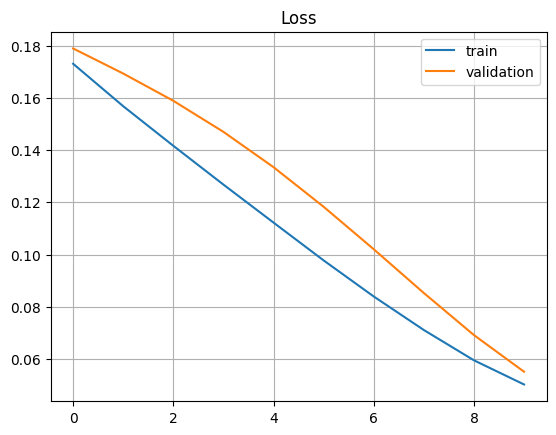

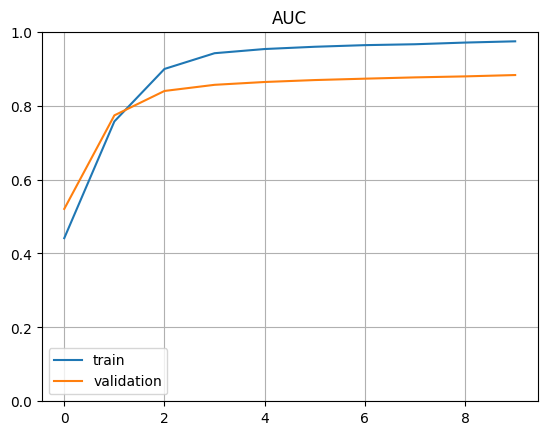

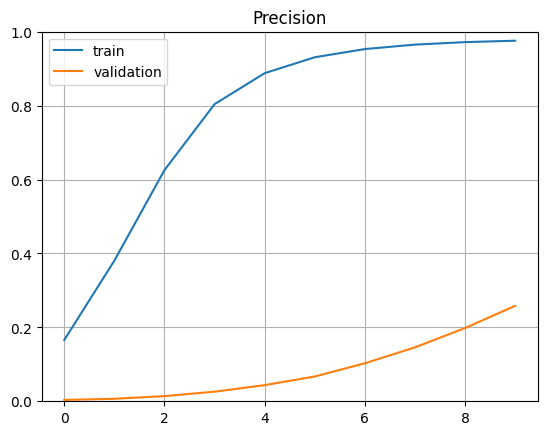

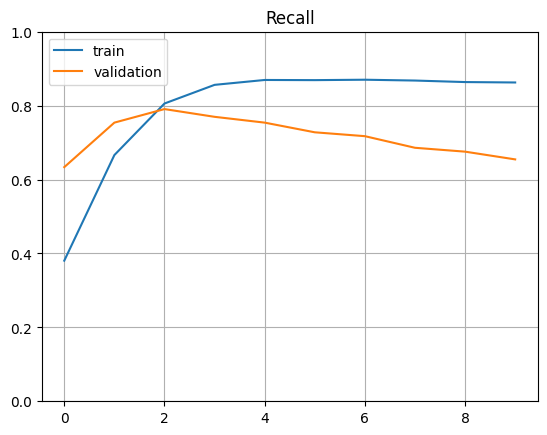

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     75668
           1       0.31      0.71      0.44       484

    accuracy                           0.99     76152
   macro avg       0.66      0.85      0.71     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


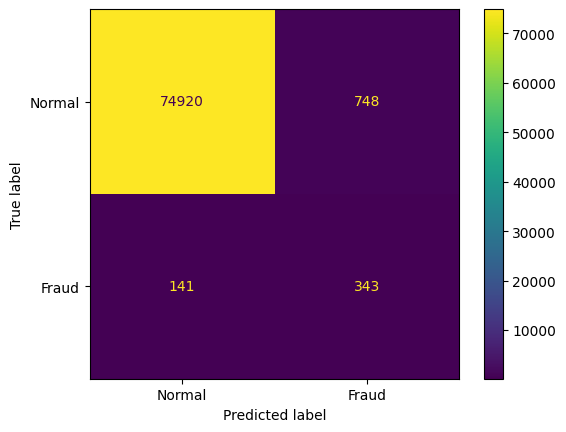

X_train_seq shape: (68126, 5, 29)
y_train_seq shape: (68126,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
2129/2129 [==============================] - 29s 12ms/step - loss: 0.1602 - accuracy: 0.6358 - precision: 0.3437 - recall: 0.9025 - auc: 0.8920 - val_loss: 0.1766 - val_accuracy: 0.4214 - val_precision: 0.0052 - val_recall: 0.8010 - val_auc: 0.7670
Epoch 2/10
2129/2129 [==============================] - 23s 11ms/step - loss: 0.1426 - accuracy: 0.8288 - precision: 0.5434 - recall: 0.9030 - auc: 0.9405 - val_loss: 0.1629 - val_accuracy: 0.6962 - val_precision: 0.0094 - val_recall: 0.7644 - val_auc: 0.8016
Epoch 3/10
2129/2129 [==============================] - 24s 11ms/step - loss: 0.1257 - accuracy: 0.9251 - precision: 0.7691 - recall: 0.8939 - auc: 0.9527 - val_loss: 0.1486 - val_accuracy: 0.8504 - val_precision: 0.0173 - val_recall: 0.6963 - val_auc: 0.8145
Epoch 4/10
2129/2129 [==============================] - 24s 11ms/step - loss: 0.1091 - accuracy: 0.9

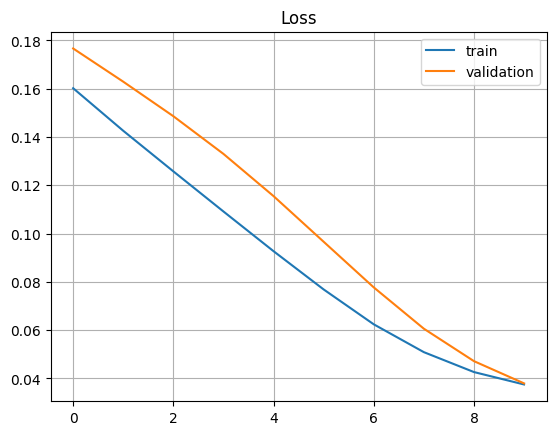

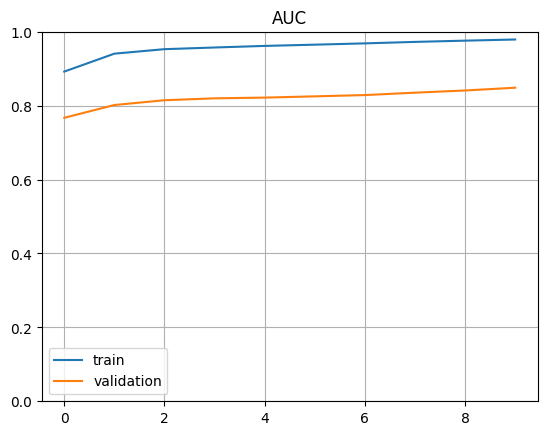

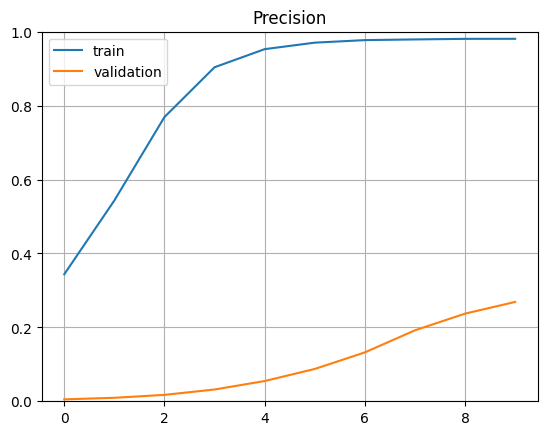

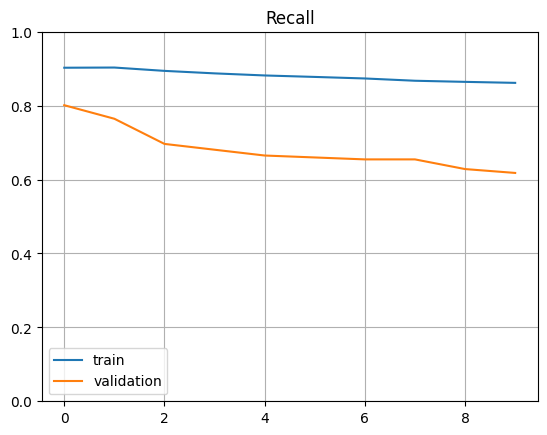

2380/2380 [==============================] - 9s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     75668
           1       0.34      0.71      0.46       484

    accuracy                           0.99     76152
   macro avg       0.67      0.85      0.73     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


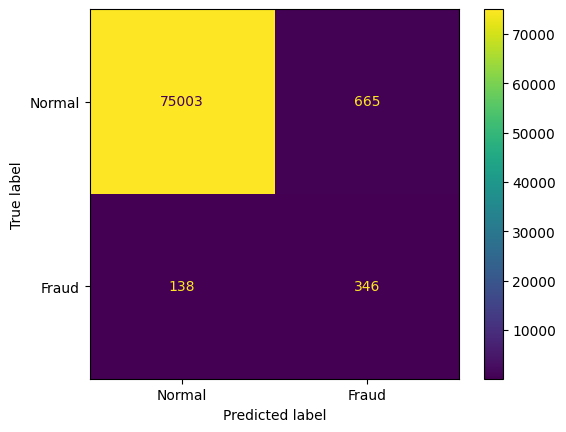

X_train_seq shape: (77937, 5, 29)
y_train_seq shape: (77937,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
2436/2436 [==============================] - 31s 11ms/step - loss: 0.1591 - accuracy: 0.6753 - precision: 0.3671 - recall: 0.8610 - auc: 0.8690 - val_loss: 0.1604 - val_accuracy: 0.7598 - val_precision: 0.0122 - val_recall: 0.7853 - val_auc: 0.8533
Epoch 2/10
2436/2436 [==============================] - 27s 11ms/step - loss: 0.1400 - accuracy: 0.8510 - precision: 0.5856 - recall: 0.8723 - auc: 0.9354 - val_loss: 0.1443 - val_accuracy: 0.9126 - val_precision: 0.0311 - val_recall: 0.7382 - val_auc: 0.8712
Epoch 3/10
2436/2436 [==============================] - 26s 11ms/step - loss: 0.1214 - accuracy: 0.9326 - precision: 0.8120 - recall: 0.8628 - auc: 0.9480 - val_loss: 0.1265 - val_accuracy: 0.9685 - val_precision: 0.0783 - val_recall: 0.6859 - val_auc: 0.8727
Epoch 4/10
2436/2436 [==============================] - 26s 11ms/step - loss: 0.1027 - accuracy: 0.9

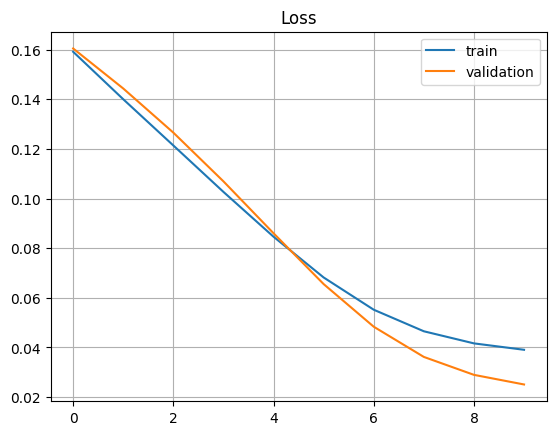

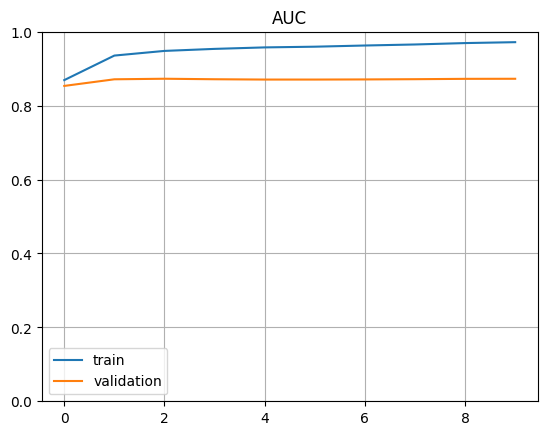

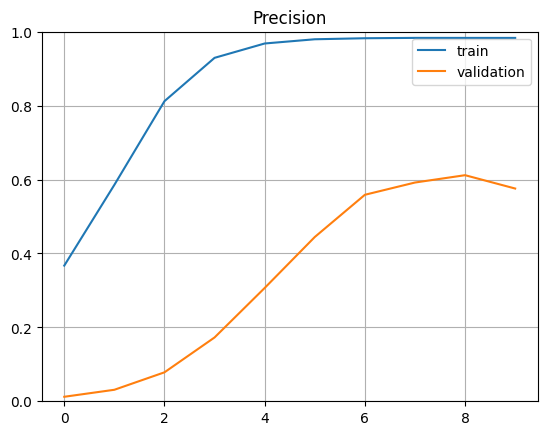

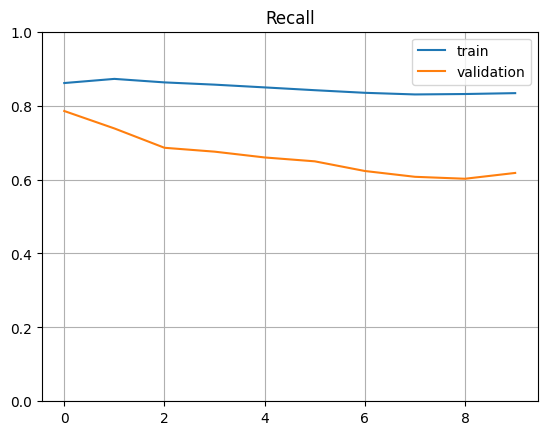

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75668
           1       0.71      0.71      0.71       484

    accuracy                           1.00     76152
   macro avg       0.86      0.85      0.86     76152
weighted avg       1.00      1.00      1.00     76152

Confusion Matrix:


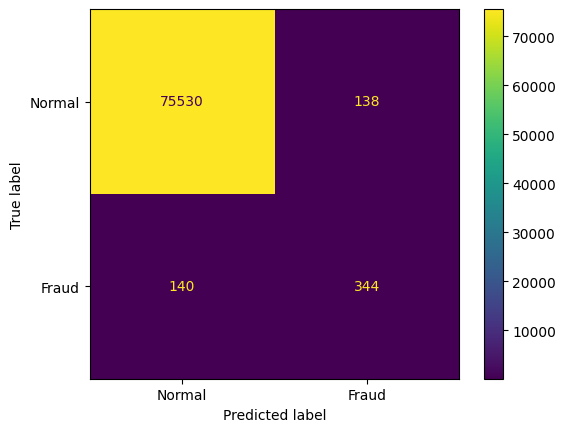

X_train_seq shape: (87722, 5, 29)
y_train_seq shape: (87722,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
2742/2742 [==============================] - 34s 11ms/step - loss: 0.1597 - accuracy: 0.6971 - precision: 0.3733 - recall: 0.7577 - auc: 0.8066 - val_loss: 0.1730 - val_accuracy: 0.5245 - val_precision: 0.0068 - val_recall: 0.8691 - val_auc: 0.8455
Epoch 2/10
2742/2742 [==============================] - 29s 11ms/step - loss: 0.1352 - accuracy: 0.8931 - precision: 0.6900 - recall: 0.8454 - auc: 0.9282 - val_loss: 0.1584 - val_accuracy: 0.7254 - val_precision: 0.0107 - val_recall: 0.7906 - val_auc: 0.8716
Epoch 3/10
2742/2742 [==============================] - 29s 11ms/step - loss: 0.1129 - accuracy: 0.9468 - precision: 0.8855 - recall: 0.8430 - auc: 0.9433 - val_loss: 0.1400 - val_accuracy: 0.8561 - val_precision: 0.0191 - val_recall: 0.7382 - val_auc: 0.8747
Epoch 4/10
2742/2742 [==============================] - 29s 10ms/step - loss: 0.0917 - accuracy: 0.9

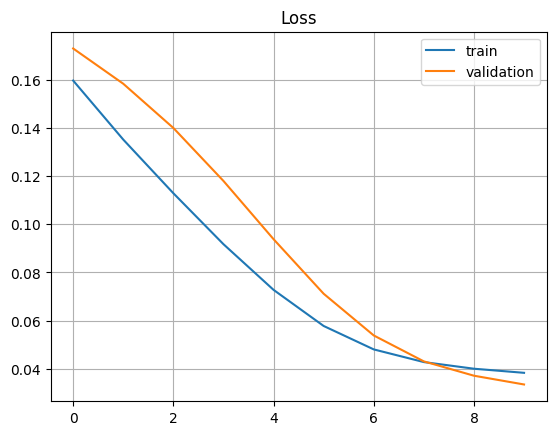

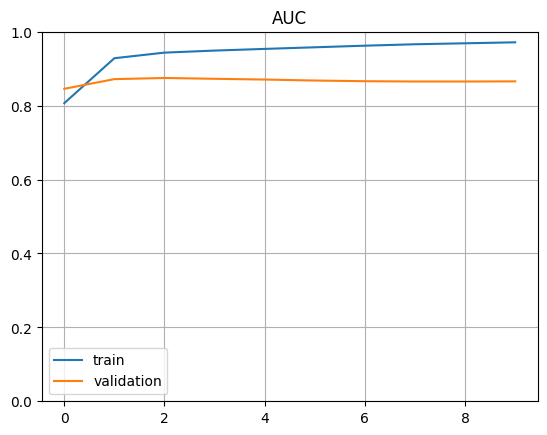

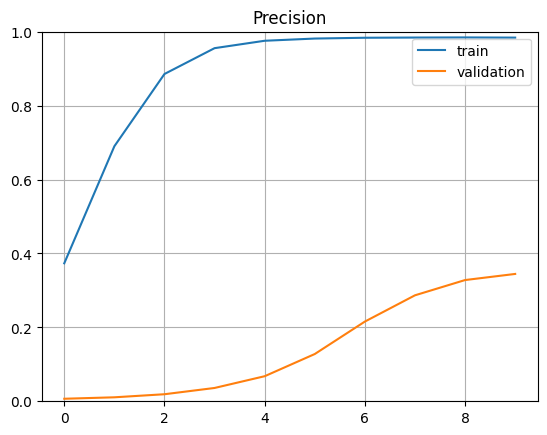

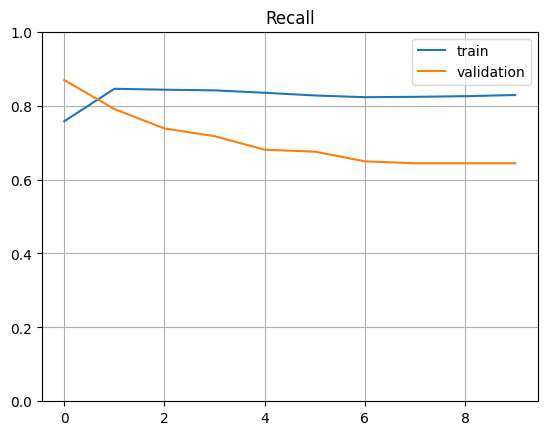

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     75668
           1       0.45      0.73      0.56       484

    accuracy                           0.99     76152
   macro avg       0.73      0.86      0.78     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


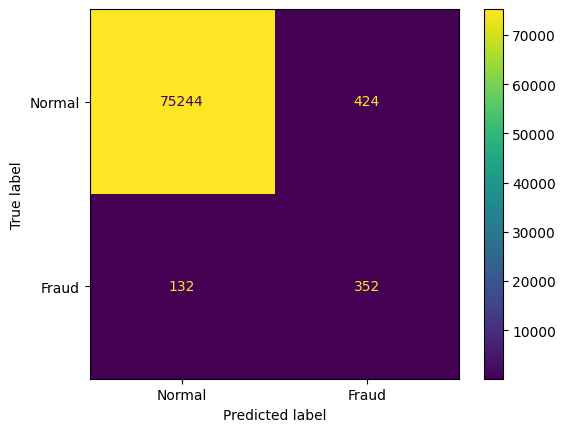

X_train_seq shape: (97502, 5, 29)
y_train_seq shape: (97502,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
3047/3047 [==============================] - 36s 11ms/step - loss: 0.1630 - accuracy: 0.6825 - precision: 0.3244 - recall: 0.5426 - auc: 0.6480 - val_loss: 0.1645 - val_accuracy: 0.6568 - val_precision: 0.0082 - val_recall: 0.7487 - val_auc: 0.7822
Epoch 2/10
3047/3047 [==============================] - 32s 10ms/step - loss: 0.1314 - accuracy: 0.9019 - precision: 0.7274 - recall: 0.8145 - auc: 0.9211 - val_loss: 0.1479 - val_accuracy: 0.8361 - val_precision: 0.0162 - val_recall: 0.7120 - val_auc: 0.8299
Epoch 3/10
3047/3047 [==============================] - 32s 10ms/step - loss: 0.1051 - accuracy: 0.9531 - precision: 0.9226 - recall: 0.8357 - auc: 0.9425 - val_loss: 0.1273 - val_accuracy: 0.9207 - val_precision: 0.0320 - val_recall: 0.6859 - val_auc: 0.8345
Epoch 4/10
3047/3047 [==============================] - 32s 11ms/step - loss: 0.0814 - accuracy: 0.9

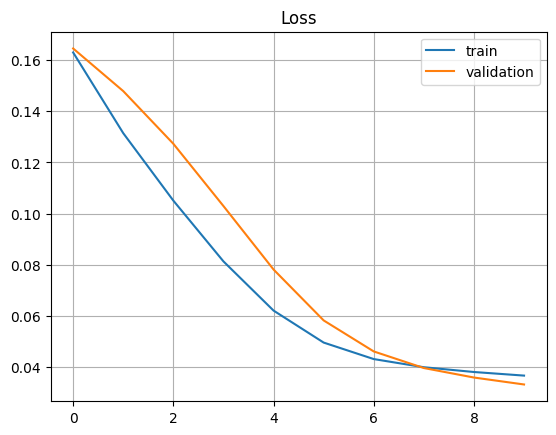

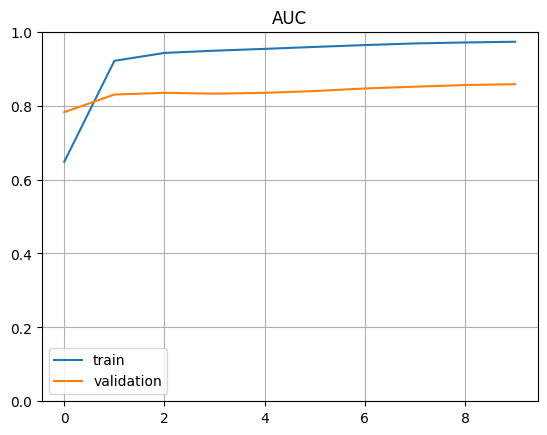

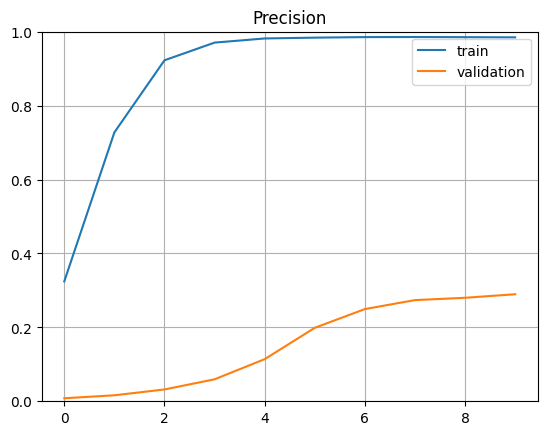

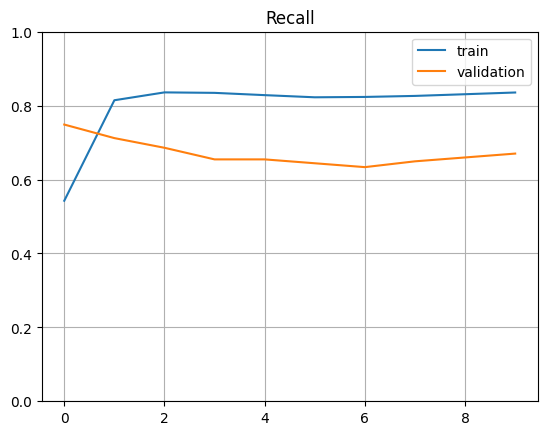

2380/2380 [==============================] - 11s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     75668
           1       0.39      0.74      0.51       484

    accuracy                           0.99     76152
   macro avg       0.69      0.87      0.75     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


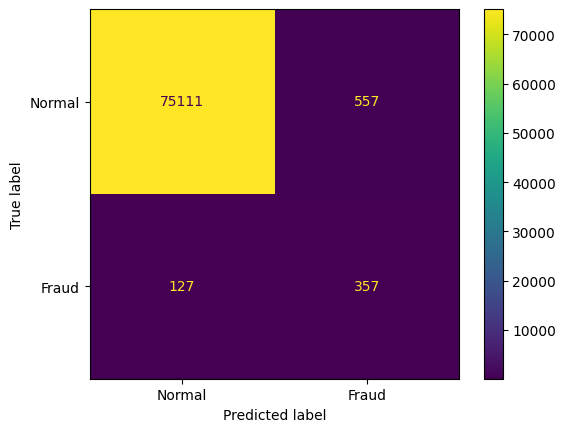

X_train_seq shape: (107281, 5, 29)
y_train_seq shape: (107281,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
3353/3353 [==============================] - 44s 12ms/step - loss: 0.1563 - accuracy: 0.7451 - precision: 0.4275 - recall: 0.8093 - auc: 0.8627 - val_loss: 0.1559 - val_accuracy: 0.8320 - val_precision: 0.0165 - val_recall: 0.7435 - val_auc: 0.8060
Epoch 2/10
3353/3353 [==============================] - 35s 10ms/step - loss: 0.1300 - accuracy: 0.9171 - precision: 0.7637 - recall: 0.8479 - auc: 0.9294 - val_loss: 0.1355 - val_accuracy: 0.9413 - val_precision: 0.0438 - val_recall: 0.7016 - val_auc: 0.8097
Epoch 3/10
3353/3353 [==============================] - 34s 10ms/step - loss: 0.1037 - accuracy: 0.9558 - precision: 0.9298 - recall: 0.8426 - auc: 0.9404 - val_loss: 0.1104 - val_accuracy: 0.9749 - val_precision: 0.0956 - val_recall: 0.6702 - val_auc: 0.8113
Epoch 4/10
3353/3353 [==============================] - 35s 10ms/step - loss: 0.0783 - accuracy: 0

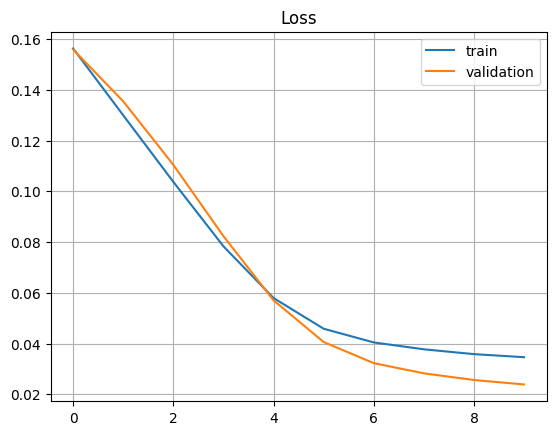

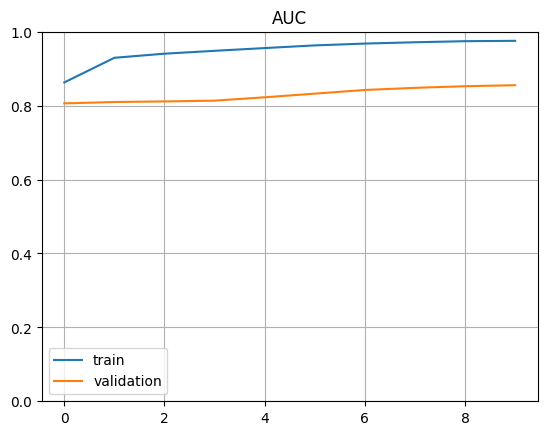

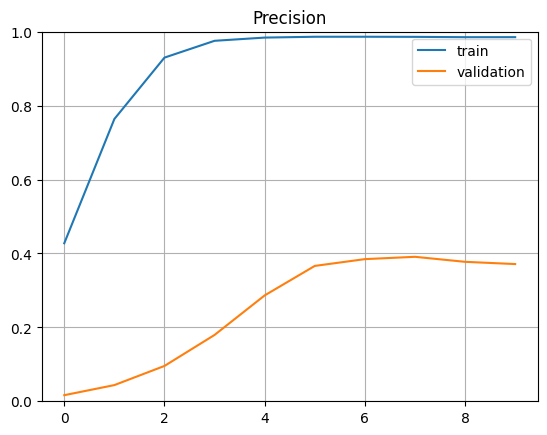

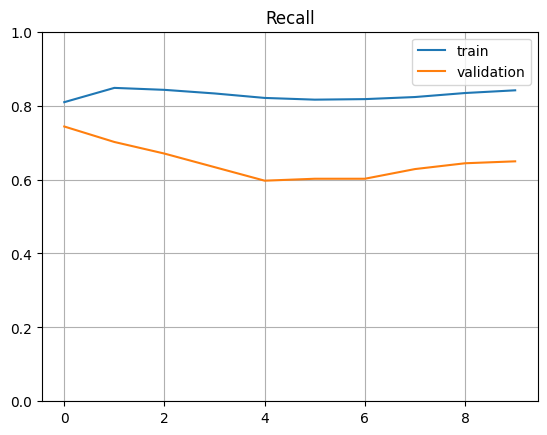

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75668
           1       0.52      0.73      0.61       484

    accuracy                           0.99     76152
   macro avg       0.76      0.86      0.80     76152
weighted avg       1.00      0.99      0.99     76152

Confusion Matrix:


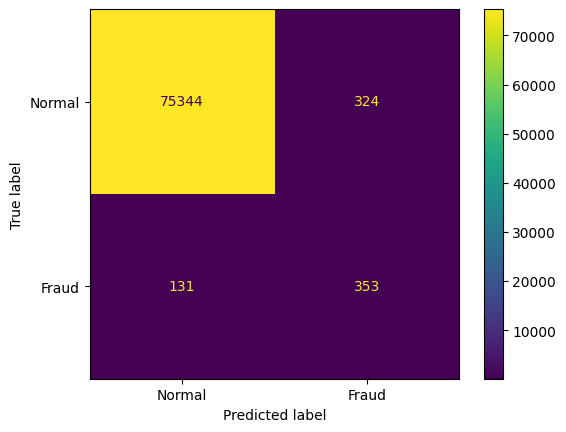

X_train_seq shape: (117072, 5, 29)
y_train_seq shape: (117072,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
3659/3659 [==============================] - 42s 10ms/step - loss: 0.1591 - accuracy: 0.6886 - precision: 0.3671 - recall: 0.7687 - auc: 0.8120 - val_loss: 0.1683 - val_accuracy: 0.5922 - val_precision: 0.0068 - val_recall: 0.7435 - val_auc: 0.7647
Epoch 2/10
3659/3659 [==============================] - 38s 10ms/step - loss: 0.1312 - accuracy: 0.9022 - precision: 0.7226 - recall: 0.8297 - auc: 0.9153 - val_loss: 0.1440 - val_accuracy: 0.8435 - val_precision: 0.0168 - val_recall: 0.7068 - val_auc: 0.8349
Epoch 3/10
3659/3659 [==============================] - 38s 10ms/step - loss: 0.1043 - accuracy: 0.9514 - precision: 0.9220 - recall: 0.8269 - auc: 0.9290 - val_loss: 0.1170 - val_accuracy: 0.9439 - val_precision: 0.0427 - val_recall: 0.6492 - val_auc: 0.8477
Epoch 4/10
3659/3659 [==============================] - 38s 10ms/step - loss: 0.0788 - accuracy: 0

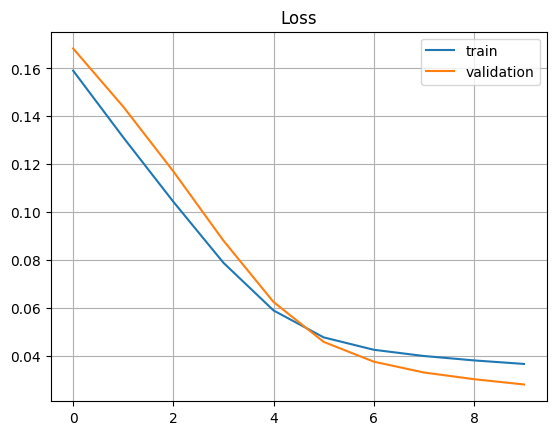

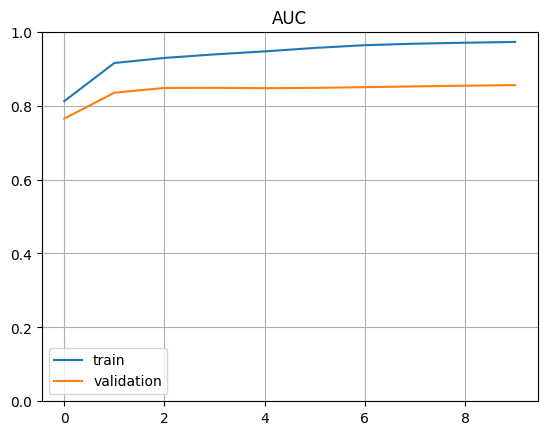

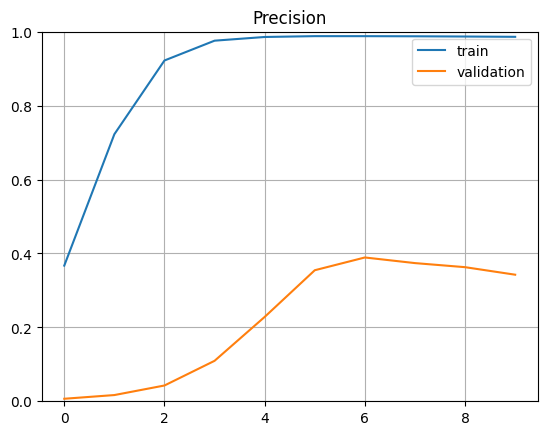

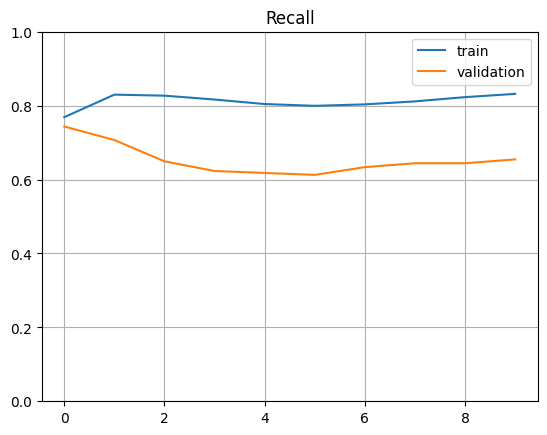

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     75668
           1       0.48      0.73      0.58       484

    accuracy                           0.99     76152
   macro avg       0.74      0.86      0.79     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


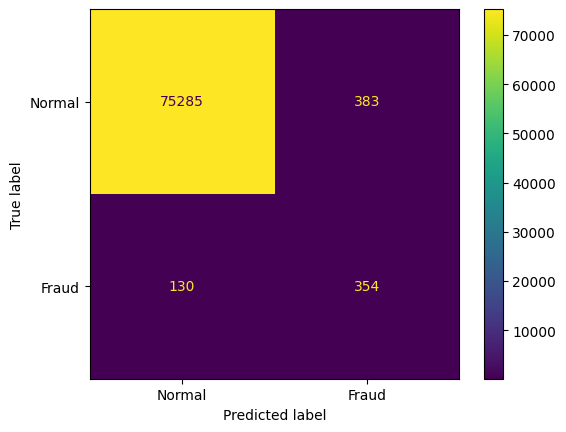

X_train_seq shape: (126876, 5, 29)
y_train_seq shape: (126876,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
3965/3965 [==============================] - 46s 11ms/step - loss: 0.1588 - accuracy: 0.6974 - precision: 0.3621 - recall: 0.6735 - auc: 0.7552 - val_loss: 0.1534 - val_accuracy: 0.8510 - val_precision: 0.0198 - val_recall: 0.7958 - val_auc: 0.8895
Epoch 2/10
3965/3965 [==============================] - 40s 10ms/step - loss: 0.1217 - accuracy: 0.9020 - precision: 0.7236 - recall: 0.8252 - auc: 0.9244 - val_loss: 0.1201 - val_accuracy: 0.9739 - val_precision: 0.0962 - val_recall: 0.7068 - val_auc: 0.8894
Epoch 3/10
3965/3965 [==============================] - 40s 10ms/step - loss: 0.0896 - accuracy: 0.9451 - precision: 0.8983 - recall: 0.8179 - auc: 0.9371 - val_loss: 0.0863 - val_accuracy: 0.9931 - val_precision: 0.3094 - val_recall: 0.6754 - val_auc: 0.8822
Epoch 4/10
3965/3965 [==============================] - 41s 10ms/step - loss: 0.0638 - accuracy: 0

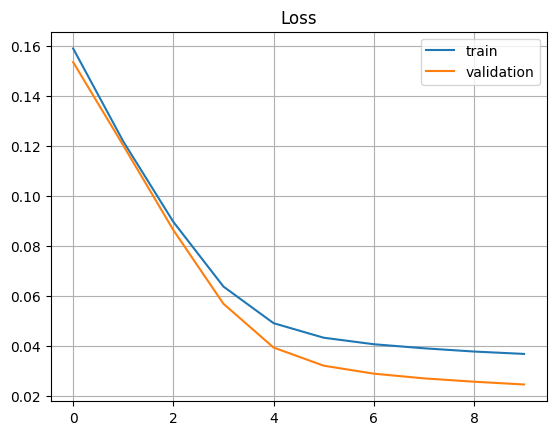

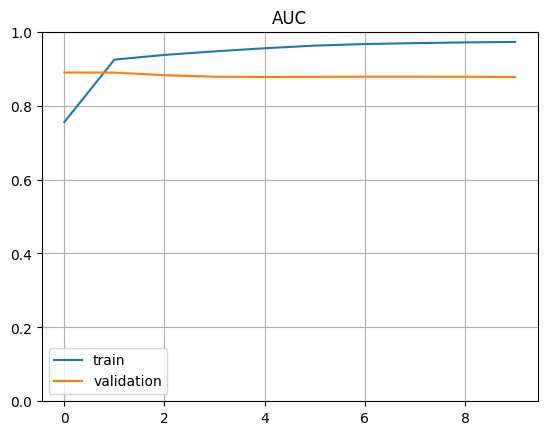

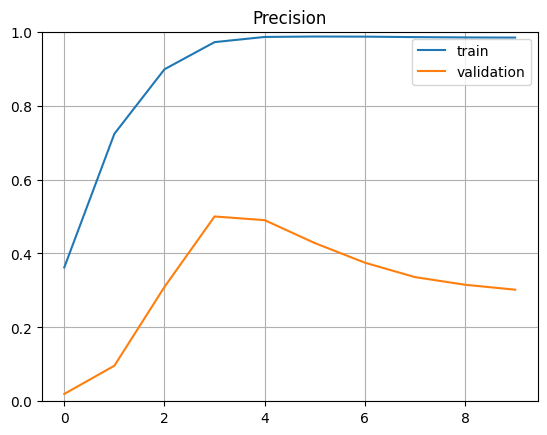

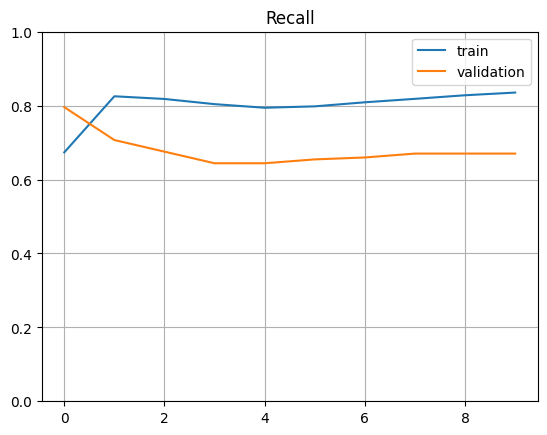

2380/2380 [==============================] - 9s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     75668
           1       0.47      0.74      0.57       484

    accuracy                           0.99     76152
   macro avg       0.73      0.87      0.79     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


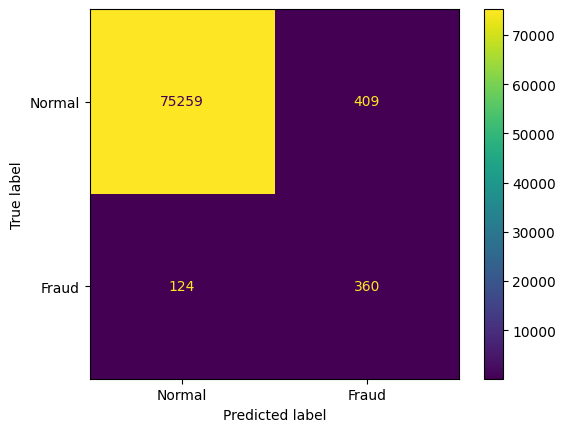

X_train_seq shape: (136692, 5, 29)
y_train_seq shape: (136692,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
4272/4272 [==============================] - 48s 10ms/step - loss: 0.1590 - accuracy: 0.7108 - precision: 0.3921 - recall: 0.8103 - auc: 0.8535 - val_loss: 0.1581 - val_accuracy: 0.8115 - val_precision: 0.0158 - val_recall: 0.8010 - val_auc: 0.8786
Epoch 2/10
4272/4272 [==============================] - 42s 10ms/step - loss: 0.1290 - accuracy: 0.9193 - precision: 0.7820 - recall: 0.8274 - auc: 0.9232 - val_loss: 0.1335 - val_accuracy: 0.9425 - val_precision: 0.0450 - val_recall: 0.7068 - val_auc: 0.8836
Epoch 3/10
4272/4272 [==============================] - 42s 10ms/step - loss: 0.0982 - accuracy: 0.9518 - precision: 0.9337 - recall: 0.8169 - auc: 0.9307 - val_loss: 0.1027 - val_accuracy: 0.9748 - val_precision: 0.0958 - val_recall: 0.6754 - val_auc: 0.8757
Epoch 4/10
4272/4272 [==============================] - 43s 10ms/step - loss: 0.0696 - accuracy: 0

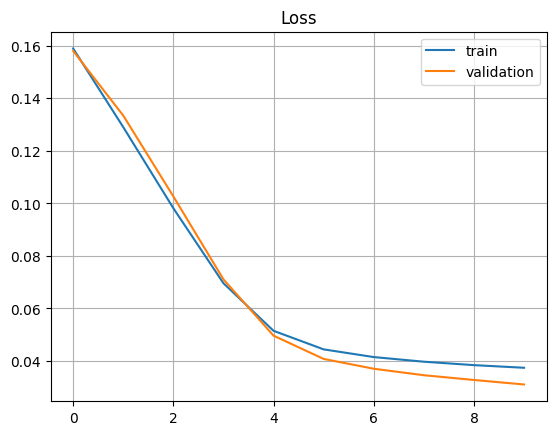

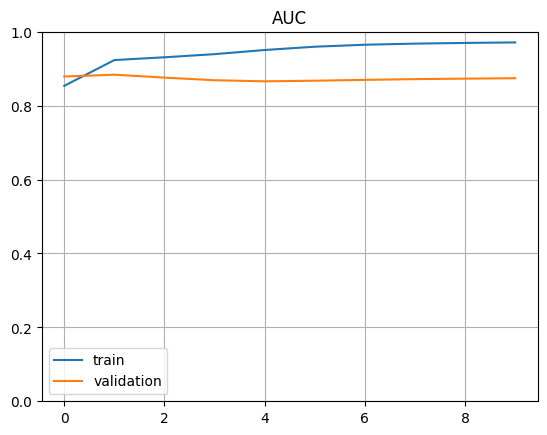

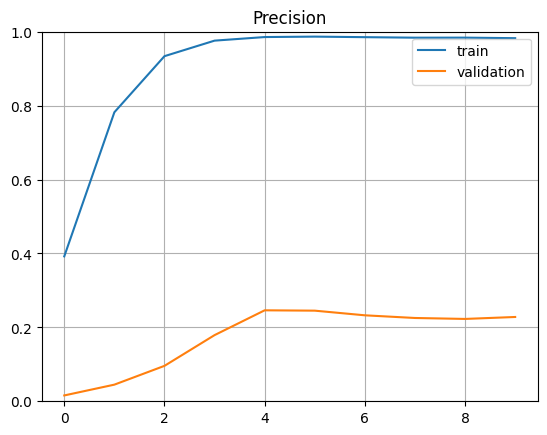

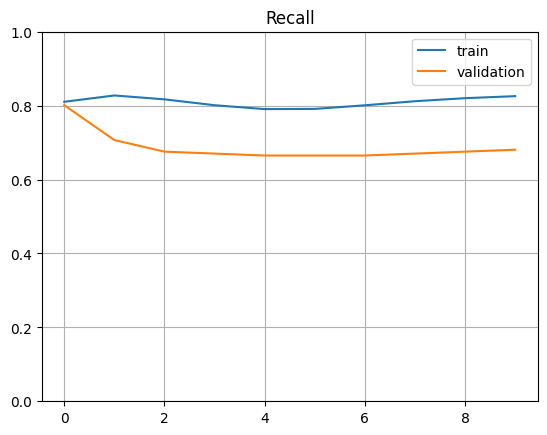

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     75668
           1       0.35      0.75      0.48       484

    accuracy                           0.99     76152
   macro avg       0.67      0.87      0.74     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


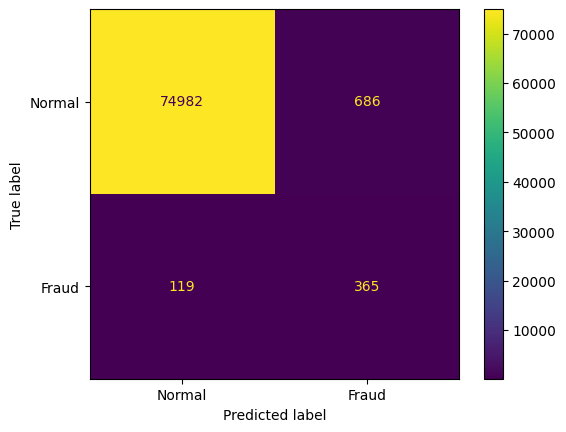

X_train_seq shape: (146522, 5, 29)
y_train_seq shape: (146522,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
4579/4579 [==============================] - 51s 10ms/step - loss: 0.1540 - accuracy: 0.7332 - precision: 0.4115 - recall: 0.7768 - auc: 0.8406 - val_loss: 0.1405 - val_accuracy: 0.8849 - val_precision: 0.0221 - val_recall: 0.6859 - val_auc: 0.8506
Epoch 2/10
4579/4579 [==============================] - 45s 10ms/step - loss: 0.1167 - accuracy: 0.9033 - precision: 0.7285 - recall: 0.8232 - auc: 0.9196 - val_loss: 0.1089 - val_accuracy: 0.9556 - val_precision: 0.0579 - val_recall: 0.7068 - val_auc: 0.8659
Epoch 3/10
4579/4579 [==============================] - 45s 10ms/step - loss: 0.0837 - accuracy: 0.9422 - precision: 0.8934 - recall: 0.8076 - auc: 0.9279 - val_loss: 0.0763 - val_accuracy: 0.9828 - val_precision: 0.1350 - val_recall: 0.6597 - val_auc: 0.8672
Epoch 4/10
4579/4579 [==============================] - 46s 10ms/step - loss: 0.0596 - accuracy: 0

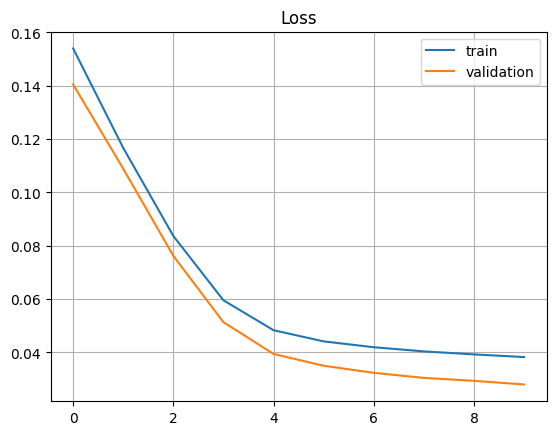

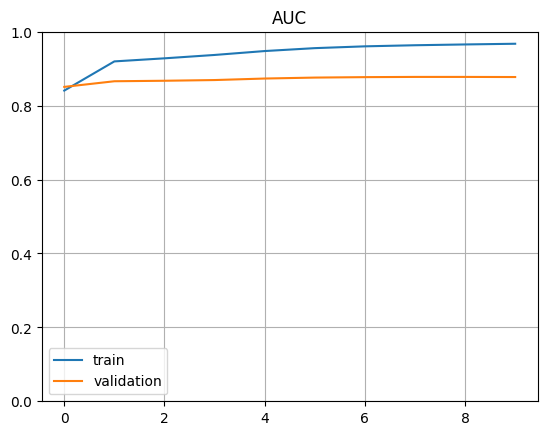

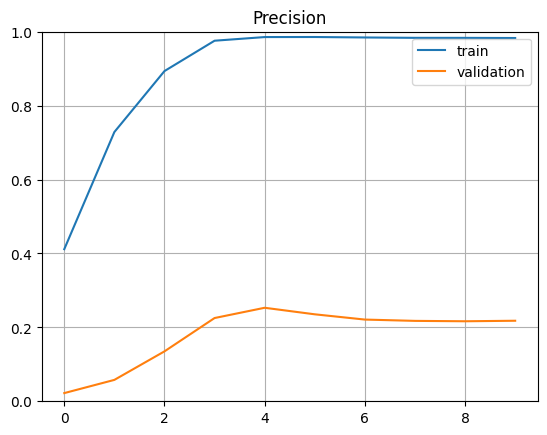

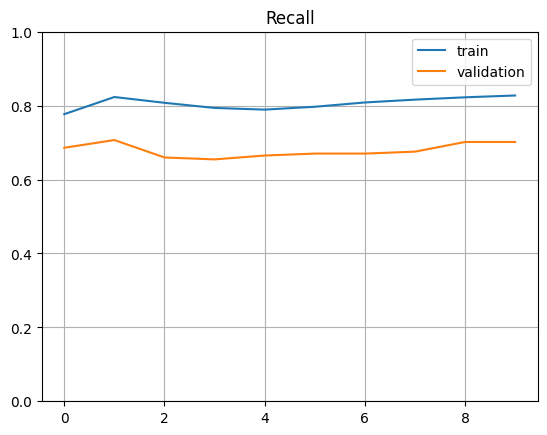

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     75668
           1       0.34      0.76      0.47       484

    accuracy                           0.99     76152
   macro avg       0.67      0.87      0.73     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


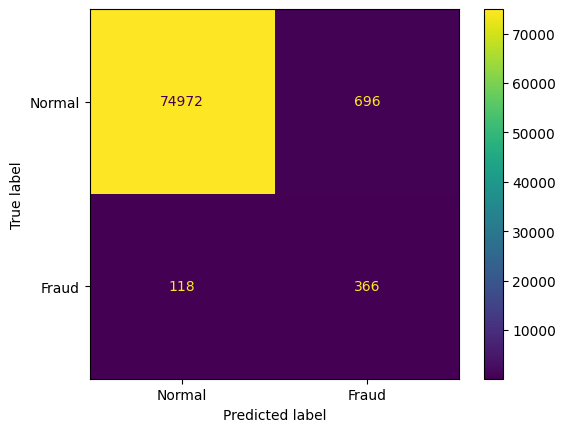

X_train_seq shape: (156295, 5, 29)
y_train_seq shape: (156295,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
4885/4885 [==============================] - 54s 10ms/step - loss: 0.1547 - accuracy: 0.7566 - precision: 0.4338 - recall: 0.7107 - auc: 0.8149 - val_loss: 0.1361 - val_accuracy: 0.9666 - val_precision: 0.0658 - val_recall: 0.5969 - val_auc: 0.8128
Epoch 2/10
4885/4885 [==============================] - 51s 10ms/step - loss: 0.1169 - accuracy: 0.9202 - precision: 0.8061 - recall: 0.7911 - auc: 0.9067 - val_loss: 0.0992 - val_accuracy: 0.9920 - val_precision: 0.2606 - val_recall: 0.6126 - val_auc: 0.8487
Epoch 3/10
4885/4885 [==============================] - 51s 10ms/step - loss: 0.0821 - accuracy: 0.9460 - precision: 0.9391 - recall: 0.7804 - auc: 0.9226 - val_loss: 0.0626 - val_accuracy: 0.9963 - val_precision: 0.5110 - val_recall: 0.6073 - val_auc: 0.8580
Epoch 4/10
4885/4885 [==============================] - 58s 12ms/step - loss: 0.0580 - accuracy: 0

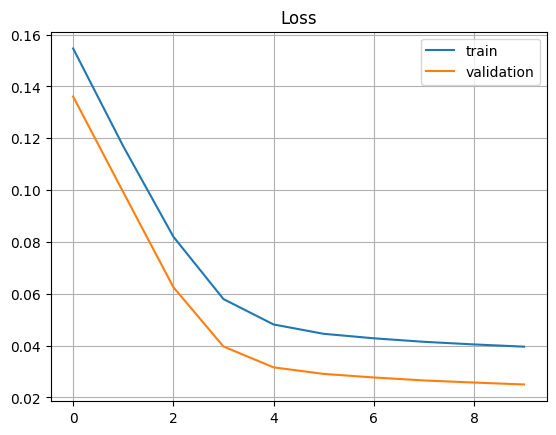

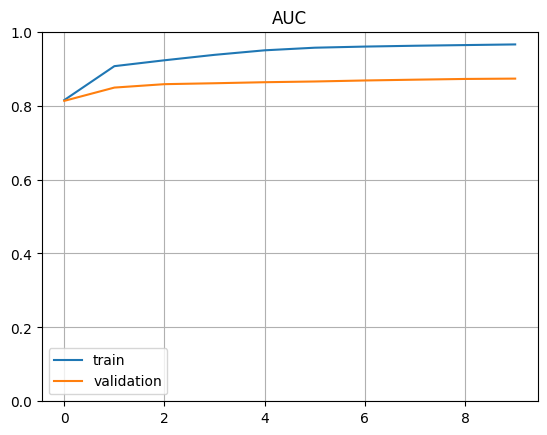

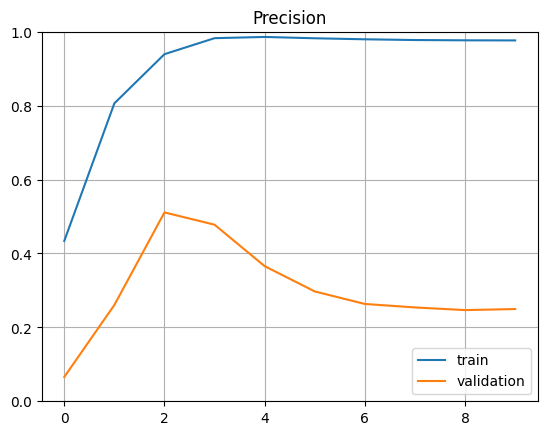

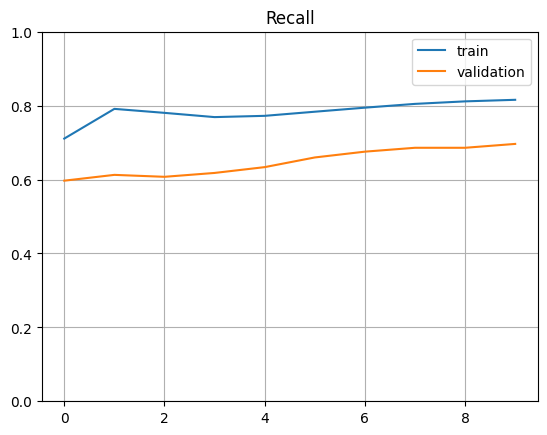

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     75668
           1       0.37      0.75      0.49       484

    accuracy                           0.99     76152
   macro avg       0.68      0.87      0.74     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


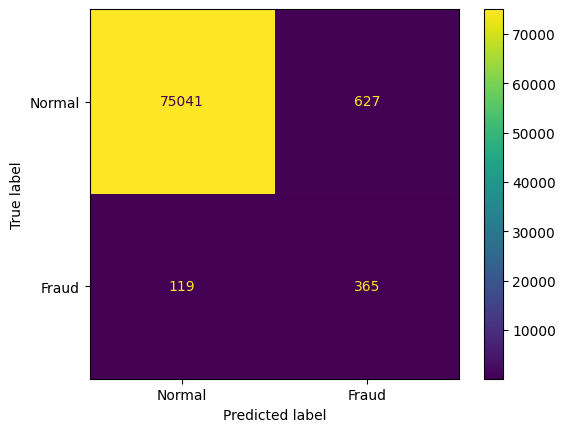

X_train_seq shape: (166148, 5, 29)
y_train_seq shape: (166148,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
5193/5193 [==============================] - 57s 10ms/step - loss: 0.1476 - accuracy: 0.8000 - precision: 0.4999 - recall: 0.8472 - auc: 0.9039 - val_loss: 0.1250 - val_accuracy: 0.9770 - val_precision: 0.1127 - val_recall: 0.7435 - val_auc: 0.8697
Epoch 2/10
5193/5193 [==============================] - 53s 10ms/step - loss: 0.1098 - accuracy: 0.9263 - precision: 0.8193 - recall: 0.8102 - auc: 0.9211 - val_loss: 0.0841 - val_accuracy: 0.9940 - val_precision: 0.3468 - val_recall: 0.6754 - val_auc: 0.8710
Epoch 3/10
5193/5193 [==============================] - 54s 10ms/step - loss: 0.0740 - accuracy: 0.9485 - precision: 0.9479 - recall: 0.7858 - auc: 0.9305 - val_loss: 0.0471 - val_accuracy: 0.9969 - val_precision: 0.5842 - val_recall: 0.6178 - val_auc: 0.8683
Epoch 4/10
5193/5193 [==============================] - 53s 10ms/step - loss: 0.0528 - accuracy: 0

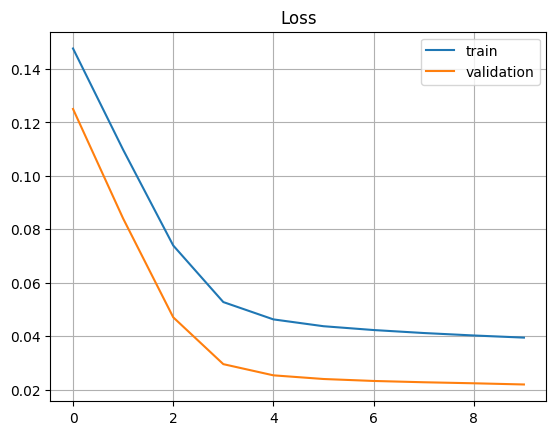

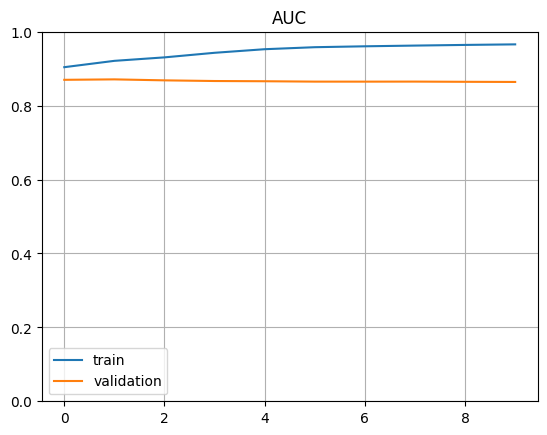

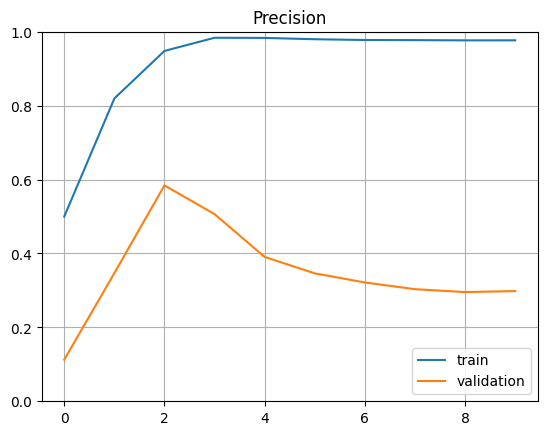

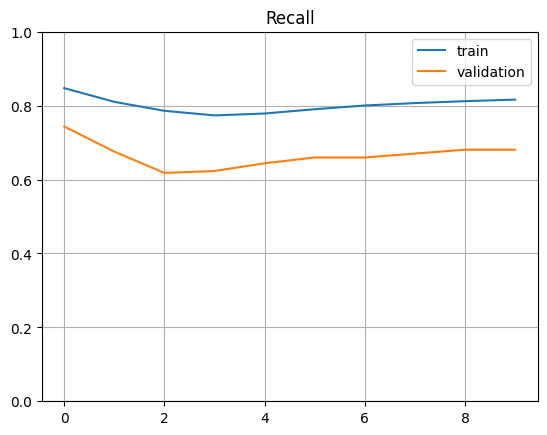

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     75668
           1       0.46      0.75      0.57       484

    accuracy                           0.99     76152
   macro avg       0.73      0.87      0.78     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


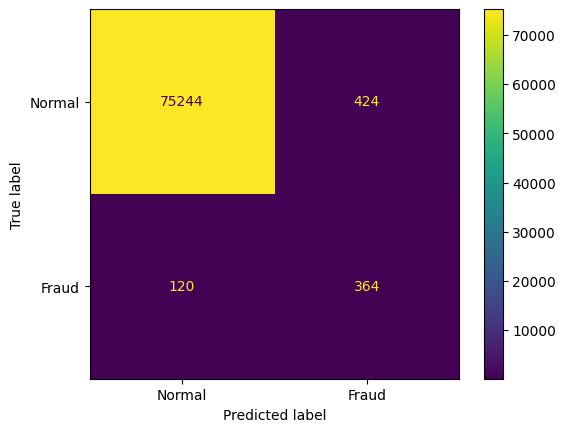

X_train_seq shape: (175987, 5, 29)
y_train_seq shape: (175987,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
5500/5500 [==============================] - 59s 10ms/step - loss: 0.1555 - accuracy: 0.7558 - precision: 0.4333 - recall: 0.7184 - auc: 0.8148 - val_loss: 0.1382 - val_accuracy: 0.9565 - val_precision: 0.0535 - val_recall: 0.6335 - val_auc: 0.8583
Epoch 2/10
5500/5500 [==============================] - 54s 10ms/step - loss: 0.1152 - accuracy: 0.9240 - precision: 0.8213 - recall: 0.7924 - auc: 0.9043 - val_loss: 0.1018 - val_accuracy: 0.9853 - val_precision: 0.1522 - val_recall: 0.6335 - val_auc: 0.8903
Epoch 3/10
5500/5500 [==============================] - 54s 10ms/step - loss: 0.0789 - accuracy: 0.9465 - precision: 0.9444 - recall: 0.7784 - auc: 0.9186 - val_loss: 0.0661 - val_accuracy: 0.9938 - val_precision: 0.3315 - val_recall: 0.6283 - val_auc: 0.8871
Epoch 4/10
5500/5500 [==============================] - 56s 10ms/step - loss: 0.0558 - accuracy: 0

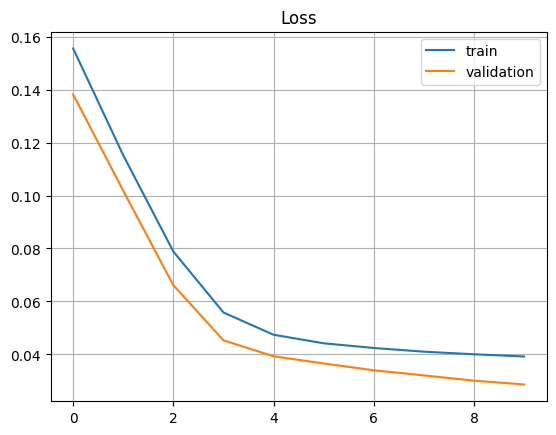

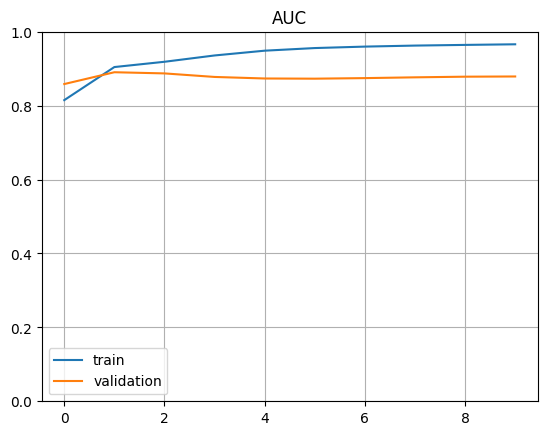

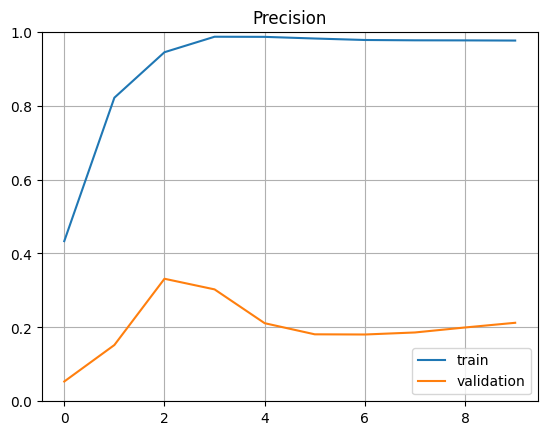

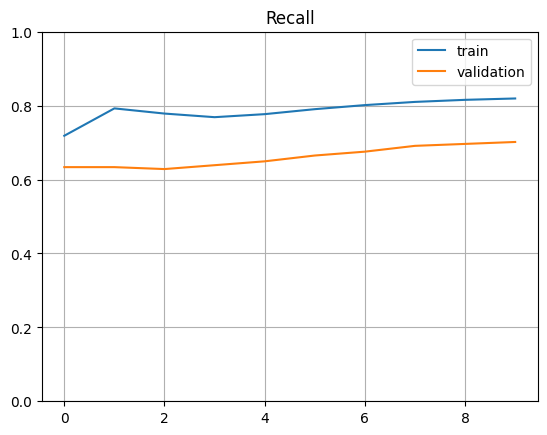

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     75668
           1       0.32      0.77      0.46       484

    accuracy                           0.99     76152
   macro avg       0.66      0.88      0.72     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


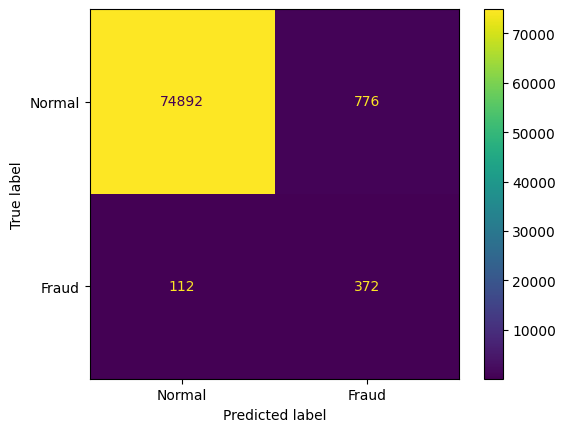

X_train_seq shape: (185722, 5, 29)
y_train_seq shape: (185722,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
5804/5804 [==============================] - 61s 10ms/step - loss: 0.1523 - accuracy: 0.7509 - precision: 0.4297 - recall: 0.7505 - auc: 0.8367 - val_loss: 0.1315 - val_accuracy: 0.9560 - val_precision: 0.0561 - val_recall: 0.6754 - val_auc: 0.8639
Epoch 2/10
5804/5804 [==============================] - 56s 10ms/step - loss: 0.1053 - accuracy: 0.9301 - precision: 0.8511 - recall: 0.7886 - auc: 0.9155 - val_loss: 0.0836 - val_accuracy: 0.9904 - val_precision: 0.2261 - val_recall: 0.6440 - val_auc: 0.8811
Epoch 3/10
5804/5804 [==============================] - 56s 10ms/step - loss: 0.0681 - accuracy: 0.9485 - precision: 0.9644 - recall: 0.7709 - auc: 0.9289 - val_loss: 0.0454 - val_accuracy: 0.9948 - val_precision: 0.3794 - val_recall: 0.6178 - val_auc: 0.8816
Epoch 4/10
5804/5804 [==============================] - 56s 10ms/step - loss: 0.0509 - accuracy: 0

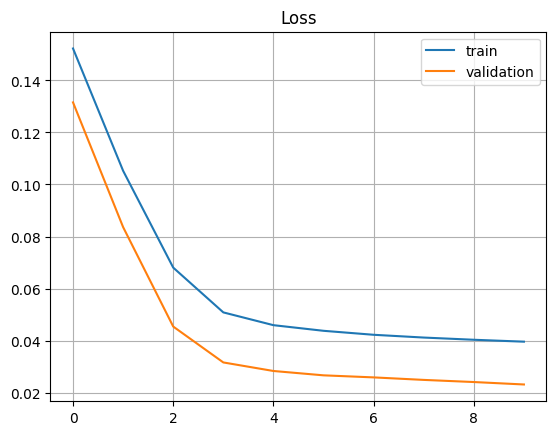

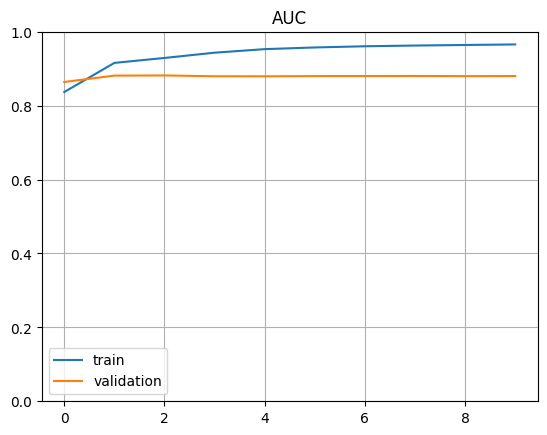

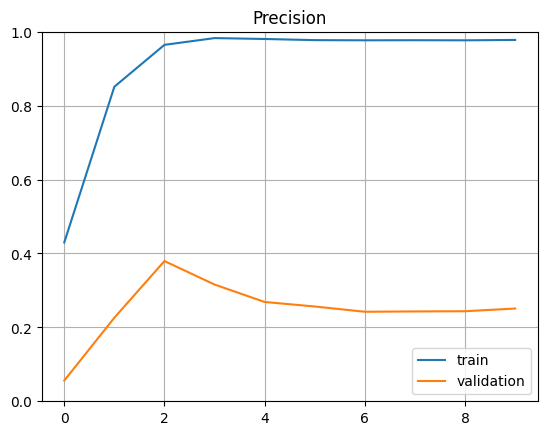

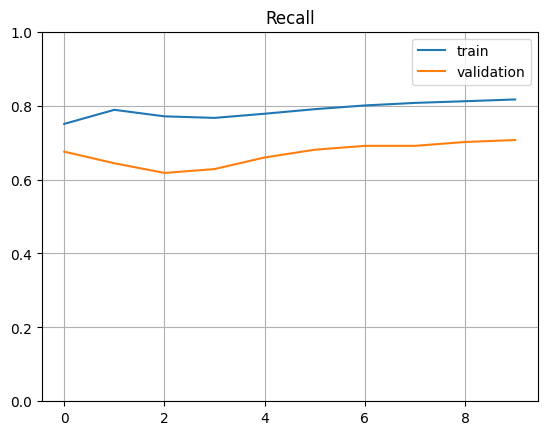

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     75668
           1       0.39      0.77      0.52       484

    accuracy                           0.99     76152
   macro avg       0.70      0.88      0.76     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


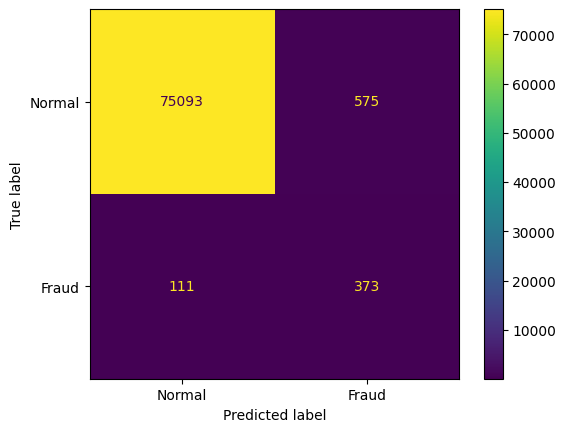

X_train_seq shape: (195317, 5, 29)
y_train_seq shape: (195317,)
X_val_seq shape: (50779, 5, 29)
y_val_seq shape: (50779,)
Epoch 1/10
6104/6104 [==============================] - 64s 10ms/step - loss: 0.1484 - accuracy: 0.7719 - precision: 0.4568 - recall: 0.7418 - auc: 0.8202 - val_loss: 0.1229 - val_accuracy: 0.9791 - val_precision: 0.1025 - val_recall: 0.5864 - val_auc: 0.7850
Epoch 2/10
6104/6104 [==============================] - 73s 12ms/step - loss: 0.1013 - accuracy: 0.9461 - precision: 0.9292 - recall: 0.7907 - auc: 0.9013 - val_loss: 0.0736 - val_accuracy: 0.9973 - val_precision: 0.6429 - val_recall: 0.6126 - val_auc: 0.8212
Epoch 3/10
6104/6104 [==============================] - 72s 12ms/step - loss: 0.0646 - accuracy: 0.9540 - precision: 0.9875 - recall: 0.7801 - auc: 0.9265 - val_loss: 0.0366 - val_accuracy: 0.9977 - val_precision: 0.7308 - val_recall: 0.5969 - val_auc: 0.8496
Epoch 4/10
6104/6104 [==============================] - 63s 10ms/step - loss: 0.0488 - accuracy: 0

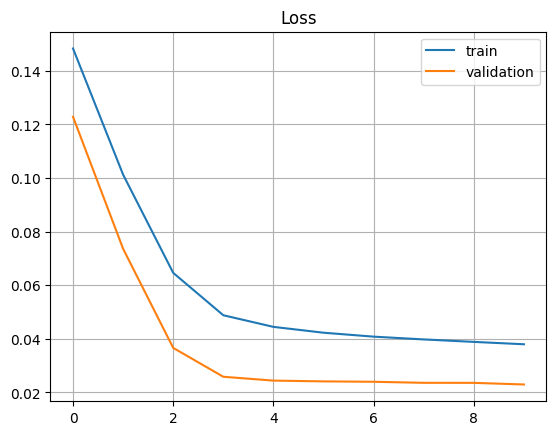

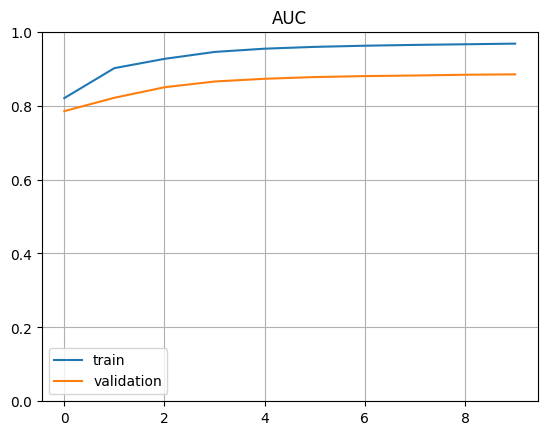

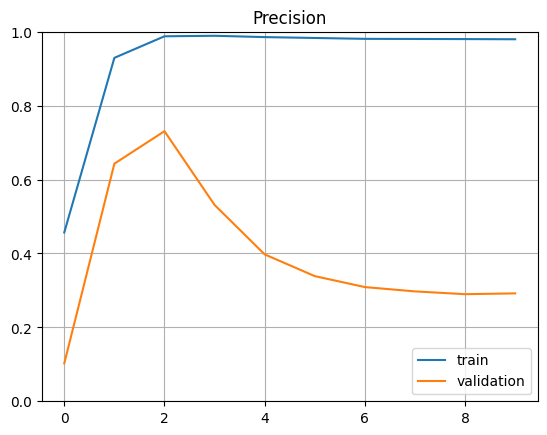

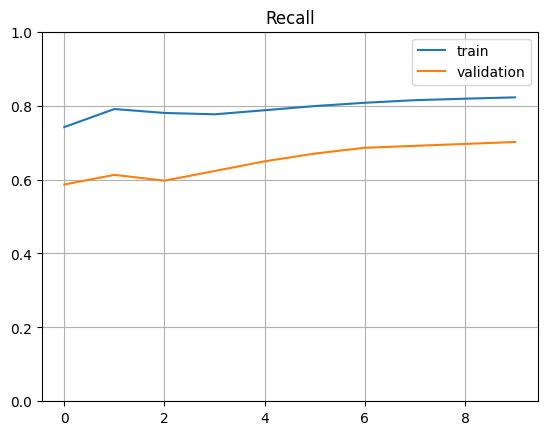

2380/2380 [==============================] - 10s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     75668
           1       0.43      0.77      0.55       484

    accuracy                           0.99     76152
   macro avg       0.71      0.88      0.77     76152
weighted avg       0.99      0.99      0.99     76152

Confusion Matrix:


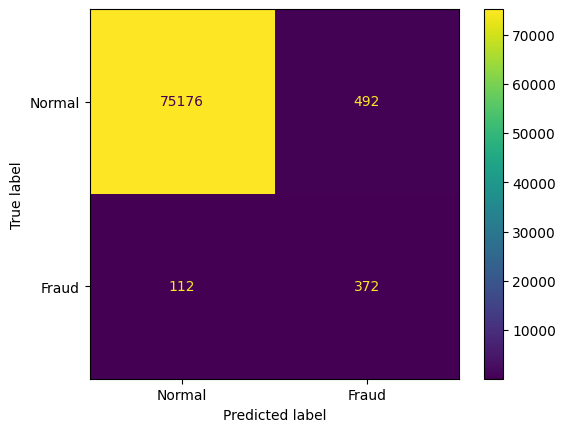

In [3]:
models = []
hists = []
for X_train_seq, y_train_seq in zip(X_train_seq_datasets, y_train_seq_datasets):
    print(f'X_train_seq shape: {X_train_seq.shape}')
    print(f'y_train_seq shape: {y_train_seq.shape}')
    print(f'X_val_seq shape: {X_val_seq.shape}')
    print(f'y_val_seq shape: {y_val_seq.shape}')
    model, hist = train_and_plot_results(X_train_seq, y_train_seq, X_test_seq, y_test_seq, best_hp, X_val=X_val_seq, y_val=y_val_seq)
    models.append(model)
    hists.append(hist)


2380/2380 [==============================] - 8s 3ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 16/494 [..............................] - ETA: 1s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 8s 3ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 37/494 [=>............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 7s 3ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 31/494 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 8s 3ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 15/494 [..............................] - ETA: 1s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 10s 4ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 36/494 [=>............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 11s 5ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 34/494 [=>............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 9s 4ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 31/494 [>.............................] - ETA: 1s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 8s 4ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  6/494 [..............................] - ETA: 6s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 9s 4ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 17/494 [>.............................] - ETA: 1s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 8s 3ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

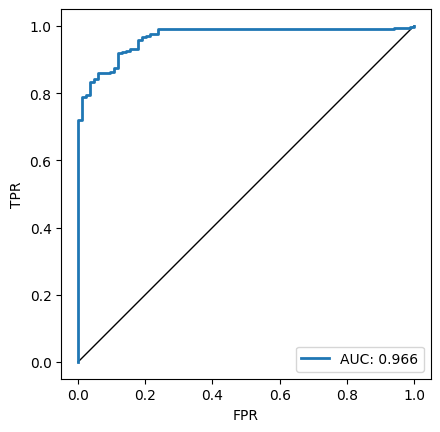

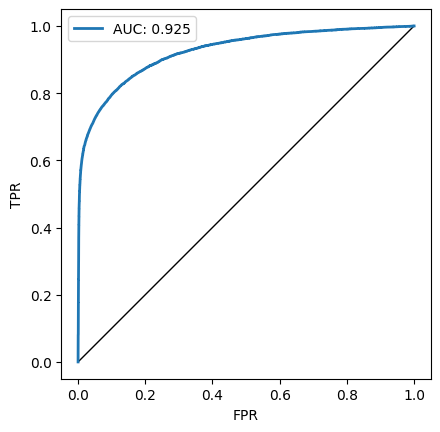

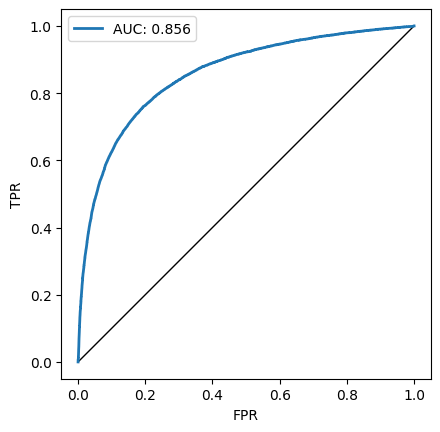

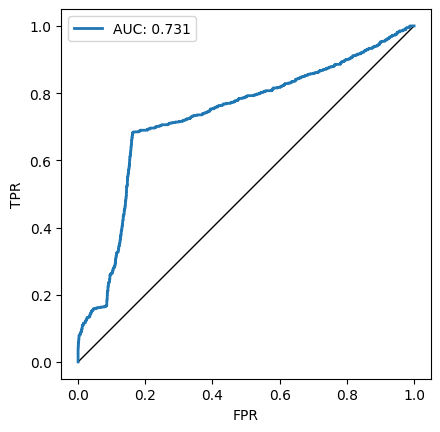

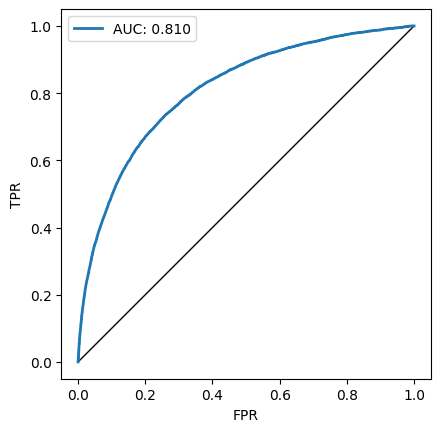

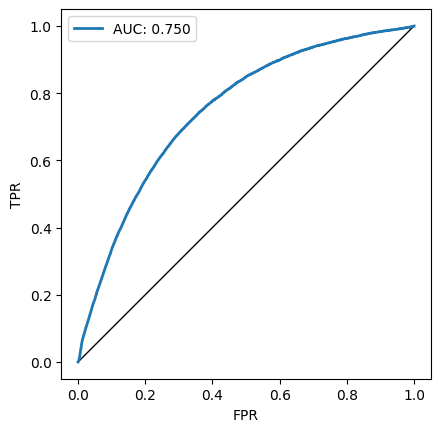

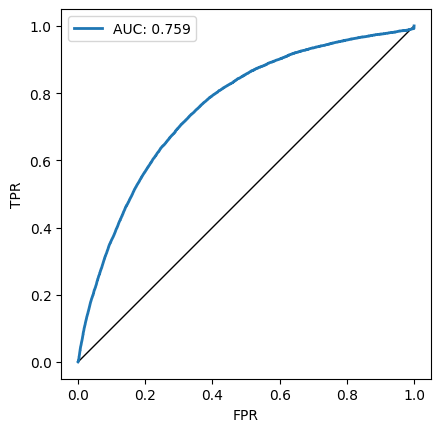

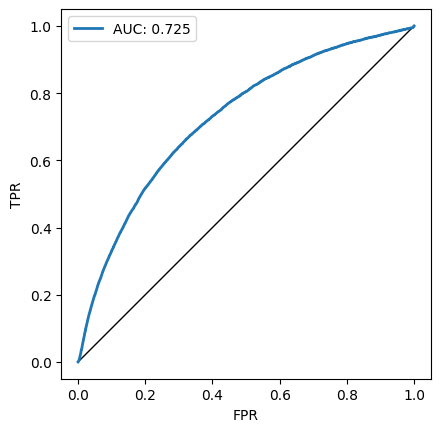

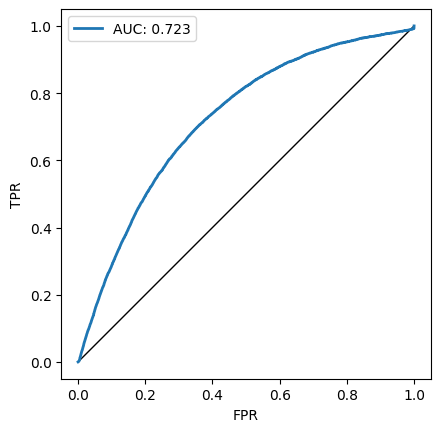

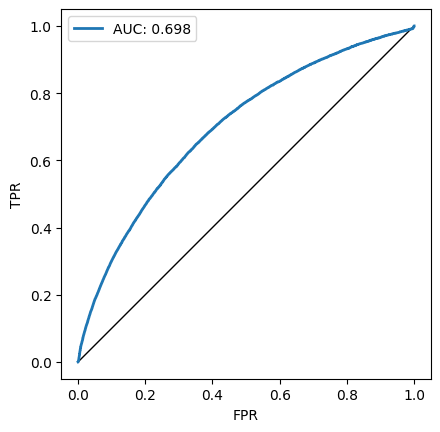

In [12]:
from services.eval_privacy import compute_mia_attacks

attacks_results_list = []
figure_list = []
for model in models:
    attacks_result, figure = compute_mia_attacks(model, X_train_seq_datasets_original[0], X_test_seq, y_train_seq_datasets_original[0], y_test_seq)
    attacks_results_list.append(attacks_result)
    figure_list.append(figure)

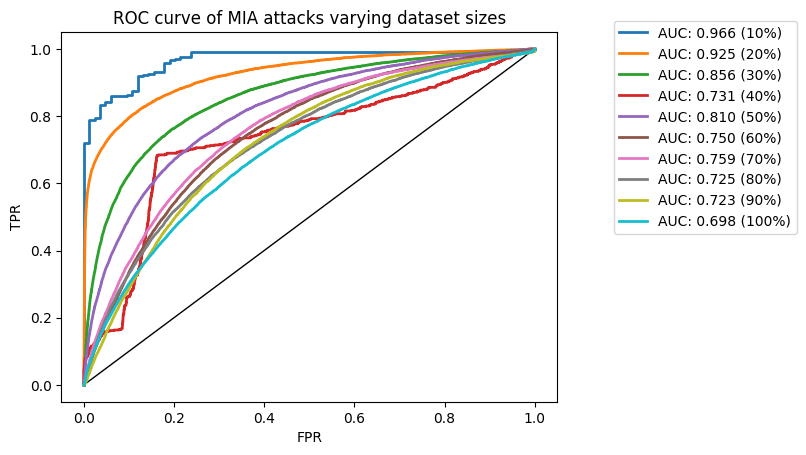

In [13]:
import matplotlib.pyplot as plt
from sklearn import metrics

attacks_results_list[0].get_result_with_max_auc().roc_curve.fpr

fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k', lw=1.0)

for i, attacks_result in enumerate(attacks_results_list):
    x = attacks_result.get_result_with_max_auc().roc_curve.fpr
    y = attacks_result.get_result_with_max_auc().roc_curve.tpr
    plt.plot(x, y, lw=2, label=f'AUC: {metrics.auc(x, y):.3f} ({(i+1)*10}%)')
plt.title('ROC curve of MIA attacks varying dataset sizes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [14]:
from sklearn.metrics import classification_report

classification_reports = []
for model, X_train_seq, y_train_seq in zip(models, X_train_seq_datasets, y_train_seq_datasets):
    y_pred = model.predict(X_test_seq)
    cr = classification_report(y_test_seq, y_pred > 0.5, output_dict=True)
    classification_reports.append(cr)

2380/2380 [==============================] - 8s 3ms/step


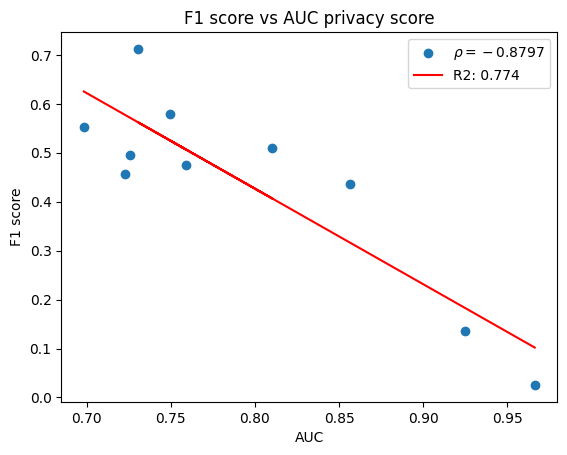

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np

aucs = []
f1_scores = []
recalls = []
precisions = []
for cr, attacks_result in zip(classification_reports, attacks_results_list):
    x = attacks_result.get_result_with_max_auc().roc_curve.fpr
    y = attacks_result.get_result_with_max_auc().roc_curve.tpr
    auc = metrics.auc(x, y)
    f1_score = cr['1']['f1-score']
    recall = cr['1']['recall']
    precision = cr['1']['precision']

    aucs.append(auc)
    f1_scores.append(f1_score)
    recalls.append(recall)
    precisions.append(precision)

aucs = np.array(aucs).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(aucs, f1_scores)

rho = np.corrcoef(aucs.flatten(), f1_scores)[0, 1]
r2 = linear_model.score(aucs, f1_scores)

fig = plt.figure()
plt.title('F1 score vs AUC privacy score')
plt.scatter(aucs, f1_scores)
plt.plot(aucs, linear_model.predict(aucs), color='red')
plt.legend([fr'$\rho = {rho:.4f}$', f'R2: {r2:.3f}'])
plt.xlabel('AUC')
plt.ylabel('F1 score')
plt.show()

In [22]:
for i, model in enumerate(models):
    model.save(f'model/varying_dataset_sizes/model_{(i+1)*10}.h5')

c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
